<a href="https://colab.research.google.com/github/AntoniXGaudi/Data_Analysis_1/blob/main/Autoscout_local_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ___

# <p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid"
# alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies.

In [ ]:
# PART 1: DATA CLEANING

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [ ]:
df = pd.read_json('C:/Data Science/Case Study/as24_cars.json')  # | the usual "\ / problem when trying to read in the file"



In [ ]:
df_copy=df.copy()

In [ ]:
# Let's remember our User Defined Function for first looking to the columns

def first_looking(col):
    print("column name    : ", col)  # Prints out related column name
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))  # Calculates the percentage of Null values for related column
    print("num_of_nulls   : ", df[col].isnull().sum())  # Prints out the total number of Null values for related column
    print("num_of_uniques : ", df[col].astype(str).nunique())  # Prints out the number of unique values for related column
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))  # Prints out the number of occurance for unique values in the related column

In [ ]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''

    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(df)
# For each column in the DataFrame, the function checks if there is more than one unique type of object in the column. If
# there is more than one unique type, the function prints out a warning message that the column has mixed object types using
# the red and bold text formatting defined in the color class.
# If all columns have the same type of object, the function prints out a "NO PROBLEM" message using the green and bold text
# formatting defined in the color class. Overall, this code is a simple utility function that helps to identify columns in a
# DataFrame that have mixed object types, which can be useful in data cleaning and preprocessing tasks.

check_obj_columns(df)

Column make_model has mixed object types.
Column short_description has mixed object types.
Column make has mixed object types.
Column model has mixed object types.
Column location has mixed object types.
Column price has mixed object types.
Column Body type has mixed object types.
Column Type has mixed object types.
Column Doors has mixed object types.
Column Country version has mixed object types.
Column Offer number has mixed object types.
Column Warranty has mixed object types.
Column Mileage has mixed object types.
Column First registration has mixed object types.
Column Gearbox has mixed object types.
Column Fuel type has mixed object types.
Column Colour has mixed object types.
Column Paint has mixed object types.
Column desc has mixed object types.
Column seller has mixed object types.
Column Seats has mixed object types.
Column Power has mixed object types.
Column Engine size has mixed object types.
Column Gears has mixed object types.
Column CO₂-emissions has mixed object type

In [ ]:
df.head(3).T # ??? What do we do with all the [\....]  ???
# df.sample(10)



,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-"
Body type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
Type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]"
Doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]"
Country version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

In [ ]:
df = df.replace("-", np.nan)

In [ ]:
count_rows_with_nans = df.isna().all(axis=1).sum()  # containing only NaNs
count_rows_with_nans

850

In [ ]:
df.dropna(how='all', inplace=True)
count_rows_with_nans = df.isna().all(axis=1).sum()  # containing only NaNs
count_rows_with_nans

0

In [ ]:
df.columns # Why are there so many \n in the headers???

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'Body type', 'Type', 'Doors', 'Country version', 'Offer number',
       'Warranty', 'Mileage', 'First registration', 'Gearbox', 'Fuel type',
       'Colour', 'Paint', 'desc', 'seller', 'Seats', 'Power', 'Engine size',
       'Gears', 'CO₂-emissions', 'Manufacturer colour', 'Drivetrain',
       'Cylinders', 'Fuel consumption', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', '\nExtras\n',
       'Empty weight', 'Model code', 'General inspection', 'Last service',
       'Full service history', 'Non-smoker vehicle', 'Emission class',
       'Emissions sticker', 'Upholstery colour', 'Upholstery',
       'Production date', 'Previous owner', 'Other fuel types',
       'Power consumption', 'Energy efficiency class', 'CO₂-efficiency',
       'Fuel consumption (WLTP)', 'CO₂-emissions (WLTP)', 'Available from',
       'Taxi or rental car', 'Availability', 'Last timing b

In [ ]:
df.shape

(28630, 58)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28630 entries, 0 to 29478
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28629 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

In [ ]:
df.isnull().sum()*100 / df.shape[0]

make_model                   0.000
short_description            0.003
make                         0.000
model                        0.000
location                     0.000
price                        0.000
Body type                    0.000
Type                         0.000
Doors                        1.254
Country version             41.009
Offer number                19.315
Warranty                    44.869
Mileage                      0.003
First registration           0.007
Gearbox                      0.866
Fuel type                    6.242
Colour                       6.022
Paint                       49.371
desc                         2.036
seller                       0.000
Seats                       10.915
Power                        1.998
Engine size                  4.900
Gears                       33.797
CO₂-emissions               35.054
Manufacturer colour         24.321
Drivetrain                  40.995
Cylinders                   34.153
Fuel consumption    

In [ ]:
# make_model

In [ ]:
df.make_model.value_counts(dropna=False)  # | 611 different car models
# ??? should we do all column titles in Uppercase?

Renault Megane     863
SEAT Leon          787
Volvo V40          740
Dacia Sandero      730
Hyundai i30        706
                  ... 
Toyota GR86          1
Toyota Tacoma        1
Toyota Tundra        1
Toyota 4-Runner      1
Volvo 244            1
Name: make_model, Length: 611, dtype: int64

In [ ]:
# short_description

In [ ]:
df.short_description.value_counts(dropna=False)

                                                      213
D2 Momentum 120                                        88
D2 Kinetic 120                                         87
Cabrio 1.4T S&S Excellence                             85
Extreme+ 7-Sitzer TCe 110                              57
                                                     ... 
PureTech  EAT8 Allure Pack...DISP. PER NOLEGGIO         1
BlueHDi 130 S&S EAT8 Business                           1
2.0 BlueHDi 180ch S\u0026S GT Line EAT8                 1
1.2 PureTech Première AUT. NAVI PANO                    1
2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUISE! L      1
Name: short_description, Length: 20947, dtype: int64

In [ ]:
# df.drop("short_description", axis=1, inplace=True)

In [ ]:
# make

In [ ]:
df.make.value_counts()

\nVolvo\n            3659
\nMercedes-Benz\n    2398
\nOpel\n             2385
\nPeugeot\n          2360
\nRenault\n          2351
\nFiat\n             2338
\nFord\n             2324
\nNissan\n           2064
\nToyota\n           2038
\nHyundai\n          1867
\nSEAT\n             1743
\nSkoda\n            1566
\nDacia\n            1537
Name: make, dtype: int64

In [ ]:
type( df["make"][1]) # | data type string

str

In [ ]:
df["make"] = df["make"].str.strip("\n") # | use strip to remove characters from a string

In [ ]:
pd.set_option('display.max_rows', 700)
df['make_model'].value_counts()


Renault Megane              863
SEAT Leon                   787
Volvo V40                   740
Dacia Sandero               730
Hyundai i30                 706
Volvo C70                   692
Opel Astra                  675
Ford Mustang                663
Peugeot 308                 537
Ford Focus                  495
Nissan Qashqai              490
SEAT Ibiza                  442
Fiat 500                    440
Fiat Tipo                   430
Renault Clio                417
Ford Fiesta                 400
Nissan Micra                390
Fiat 500X                   376
Skoda Octavia               371
Opel Corsa                  366
Volvo XC60                  364
Dacia Duster                349
Toyota Yaris                332
Volvo V60                   309
Opel Insignia               290
Peugeot 208                 262
Skoda Fabia                 251
Fiat 500C                   249
Volvo C30                   231
Toyota Auris                231
Peugeot RCZ                 220
Hyundai 

In [ ]:
df['make_model'] = df['make_model'].str.strip()  # Remove leading and trailing whitespaces
df['make_model'] = df['make_model'].str.replace('[', '')  # Remove brackets
df['make_model'] = df['make_model'].str.replace(']', '')  # Remove brackets

# Now you can filter the DataFrame
df_dacia = df[df['make_model'] == 'Nissan']
df_dacia

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,Offer number,Warranty,Mileage,First registration,Gearbox,Fuel type,Colour,Paint,desc,seller,Seats,Power,Engine size,Gears,CO₂-emissions,Manufacturer colour,Drivetrain,Cylinders,Fuel consumption,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,\nExtras\n,Empty weight,Model code,General inspection,Last service,Full service history,Non-smoker vehicle,Emission class,Emissions sticker,Upholstery colour,Upholstery,Production date,Previous owner,Other fuel types,Power consumption,Energy efficiency class,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
19591,Nissan,"Roadster nur 29.990 km, Schaltgetriebe!",Nissan,"[\n, ,\n]","St. Veiter Straße 186, 9020 Klagenfurt, AT","€ 27,990.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,NaN,NaN,"29,990 km",04/2010,[\nManual\n],Gasoline,Black,Metallic,"[Zum Verkauft angeboten wird ein seltener, Ni...",Dealer,"[\n, 2, \n]",[\n241 kW (328 hp)\n],"[\n3,696 cc\n]",[\n6\n],262 g/km (comb.),Schwarz Metallic,"[\n, Rear, \n]",NaN,"[[11.2 l/100 km (comb.)], [16.2 l/100 km (city...","[Air conditioning, Automatic climate control, ...","[Bluetooth, CD player, Hands-free equipment, O...","[ABS, Adaptive headlights, Alarm system, Dayti...","[Alloy wheels, Automatically dimming interior ...","[\n1,599 kg\n]",NaN,04/2023,NaN,Yes,NaN,Euro 5,NaN,NaN,NaN,2010.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19594,Nissan,3.7 i V6 24V 328 cv ROADSTER PACK,Nissan,"[\n, ,\n]","25 Avenue de l' Europe, 25400 Audincourt, FR","€ 25,490.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]",NaN,"[\n, 117242, \n]",NaN,"69,900 km",05/2010,[\nManual\n],Super E10 95,Black,NaN,[Tags : 328cv 328ch 328 cv ch 328 - 3.7 3l7 - ...,Dealer,"[\n, 2, \n]",[\n241 kW (328 hp)\n],NaN,NaN,262 g/km (comb.),Noir,NaN,NaN,NaN,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, On-board computer]","[ABS, Electronic stability control, Power stee...",[Sport seats],NaN,NaN,NaN,06/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19597,Nissan,Roadster Pack,Nissan,"[\n, ,\n]","Leesdorfer Hautpstraße 68-70, 2500 Baden, AT","€ 39,990.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,"[\n, 1471, \n]","[\n, 12 months, \n]","5,205 km",06/2019,[\nManual\n],Gasoline,Grey,Metallic,NaN,Dealer,"[\n, 2, \n]",[\n241 kW (328 hp)\n],"[\n3,696 cc\n]",[\n6\n],262 g/km (comb.),NaN,"[\n, Rear, \n]",NaN,"[[11.2 l/100 km (comb.)], [16.2 l/100 km (city...","[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[ABS, Alarm system, Central door lock, Central...","[Alloy wheels, Headlight washer system, Sport ...","[\n1,496 kg\n]",NaN,NaN,NaN,Yes,Yes,Euro 6,NaN,NaN,Full leather,2019.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19759,Nissan,,Nissan,"[\n, ,\n]","Hönigtalerstraße 46, 8301 Kainbach bei Graz, AT","€ 23,990.-","[\n, Coupe, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,"[\n, 911, \n]",NaN,"86,000 km",02/2012,[\nAutomatic\n],Gasoline,Black,NaN,"[ACHTUNG 2 Standorte, Standort Gleisdorf , FIN...",Dealer,"[\n, 2, \n]",[\n241 kW (328 hp)\n],"[\n3,696 cc\n]",NaN,248 g/km (comb.),Schwarz,"[\n, Rear, \n]",NaN,"[[10.5 l/100 km (comb.)], [15.3 l/100 km (city...","[Air conditioning, Automatic climate control, ...","[Bluetooth, CD player, Hands-free equipment, O...","[ABS, Alarm system, Driver-side airbag, Electr...","[Alloy wheels, Automatically dimming interior ...","[\n1,571 kg\n]",NaN,NaN,NaN,NaN,NaN,Euro 5,NaN,NaN,Full leather,2012.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19904,Nissan,Skyline r34 gtt/gtr umbau,Nissan,"[\n, ,\n]","26639 Wiesmoor, DE","€ 53,999.-","[\n, Coupe, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,NaN,NaN,"155,000 km",03/1999,[\

In [ ]:
# same goes for model

In [ ]:
# df.drop("model", axis=1, inplace=True)

In [ ]:
# Location   ??? split it up into street, city, country, zip code ???? Difficult since 9 blvd JUles Ferry is one cell, Av. Laboral, 10 is two

In [ ]:
df.location.value_counts()

Av. Laboral, 10,  28021 MADRID, ES                          306
Luckenwalder Berg 5,  14913 Jüterbog, DE                    170
Ctra. del Mig, 96,,  08097 L'Hospitalet de Llobregat, ES    146
9 boulevard Jules Ferry,  75011 Paris, FR                   142
Neuenhofstr. 77,  52078 Aachen, DE                          135
                                                           ... 
2727CT ZOETERMEER, NL                                         1
Rosendaalsestraat 437-439,  6824 CK ARNHEM, NL                1
5751VH DEURNE, NL                                             1
00148 roma, IT                                                1
Sur rendez-vous,  5060 Sambreville, BE                        1
Name: location, Length: 8181, dtype: int64

In [ ]:
df['location'] = df['location'].astype(str).str[-2:]
df['location']

0        ES
1        ES
2        ES
3        ES
4        ES
         ..
29474    ES
29475    NL
29476    BE
29477    NL
29478    NL
Name: location, Length: 28630, dtype: object

In [ ]:
# Price - definitely not to be deleted!!!

In [ ]:
df.price.value_counts(dropna=False)

€ 14,990.-    222
€ 12,990.-    219
€ 16,990.-    186
€ 19,990.-    166
€ 9,990.-     160
             ... 
€ 19,112.-      1
€ 30,465.-      1
€ 18,461.-      1
€ 22,649.-      1
€ 4,440.-       1
Name: price, Length: 5021, dtype: int64

In [ ]:
df['price'] = df['price'].str.replace('€', '').str.replace('-', '').str.replace(',', '').astype(float)
# .str.replace('€', ') removes the euro symbol.
#    .str.replace('-', ') removes the minus sign.
#    .str.replace(',', ') removes the comma to allow conversion to a float.
#    .astype(float) converts the column to the float data type.


# 2-decimal-place representation (currency)

df['price'].apply(lambda x: '{:.2f}'.format(x))

0        16950.00
1        80900.00
2        69900.00
3        46990.00
4        16800.00
           ...   
29474    37600.00
29475     5499.00
29476     7300.00
29477    29900.00
29478     4440.00
Name: price, Length: 28630, dtype: object

In [ ]:
df.price.value_counts(dropna=False)

14990.000    222
12990.000    219
16990.000    186
19990.000    166
9990.000     160
            ... 
19112.000      1
30465.000      1
18461.000      1
22649.000      1
4440.000       1
Name: price, Length: 5021, dtype: int64

In [ ]:
# Body type

In [ ]:
df["Body type"]

0        [\n, Compact, \n]
1        [\n, Compact, \n]
2        [\n, Compact, \n]
3        [\n, Compact, \n]
4        [\n, Compact, \n]
               ...        
29474      [\n, Sedan, \n]
29475      [\n, Sedan, \n]
29476      [\n, Sedan, \n]
29477      [\n, Sedan, \n]
29478      [\n, Sedan, \n]
Name: Body type, Length: 28630, dtype: object

In [ ]:
df["Body type"]= df["Body type"].str[0].str.strip("\n")

In [ ]:
df["Body type"] # getting rid of \n

0        , Compact, 
1        , Compact, 
2        , Compact, 
3        , Compact, 
4        , Compact, 
            ...     
29474      , Sedan, 
29475      , Sedan, 
29476      , Sedan, 
29477      , Sedan, 
29478      , Sedan, 
Name: Body type, Length: 28630, dtype: object

In [ ]:
df["Body type"] = df["Body type"].str.replace(",","")

In [ ]:
df["Body type"]

0         Compact 
1         Compact 
2         Compact 
3         Compact 
4         Compact 
           ...    
29474       Sedan 
29475       Sedan 
29476       Sedan 
29477       Sedan 
29478       Sedan 
Name: Body type, Length: 28630, dtype: object

In [ ]:
df["Body type"].value_counts(dropna=False)

 Station wagon        5448
 Off-Road/Pick-up     5415
 Compact              5387
 Sedan                5043
 Coupe                4009
 Convertible          3328
Name: Body type, dtype: int64

In [ ]:
# Type

In [ ]:
df["Type"].value_counts(dropna=False)   # getting rid of the [...]

[\n, Used, \n]              25251
[\n, Demonstration, \n]      1433
[\n, Pre-registered, \n]     1377
[\n, Employee's car, \n]      569
Name: Type, dtype: int64

In [ ]:
df["Type"]= df["Type"].str[0].str.strip("\n")
df["Type"]

0                  , Used, 
1        , Pre-registered, 
2                  , Used, 
3                  , Used, 
4                  , Used, 
                ...        
29474              , Used, 
29475              , Used, 
29476              , Used, 
29477              , Used, 
29478              , Used, 
Name: Type, Length: 28630, dtype: object

In [ ]:
df["Type"] = df["Type"].str.replace(",","")
df["Type"]

0                   Used 
1         Pre-registered 
2                   Used 
3                   Used 
4                   Used 
               ...       
29474               Used 
29475               Used 
29476               Used 
29477               Used 
29478               Used 
Name: Type, Length: 28630, dtype: object

In [ ]:
df["Type"].value_counts(dropna=False)

 Used               25251
 Demonstration       1433
 Pre-registered      1377
 Employee's car       569
Name: Type, dtype: int64

In [ ]:
# Doors

In [ ]:
df["Doors"].value_counts(dropna=False)
df['Doors']

0        [\n, 5, \n]
1        [\n, 4, \n]
2        [\n, 5, \n]
3        [\n, 5, \n]
4        [\n, 5, \n]
            ...     
29474    [\n, 4, \n]
29475    [\n, 4, \n]
29476    [\n, 3, \n]
29477    [\n, 4, \n]
29478    [\n, 4, \n]
Name: Doors, Length: 28630, dtype: object

In [ ]:
df['Doors']= df['Doors'].str[0].str.strip("\n")

In [ ]:
df['Doors'] = df['Doors'].str.replace(",","")

In [ ]:
df['Doors'].value_counts(dropna=False)

 5     17481
 2      5523
 4      3001
 3      2259
NaN      359
 6         5
 1         2
Name: Doors, dtype: int64

In [ ]:
df['Doors'] = df['Doors'].astype(float)
df['Doors'] = df['Doors'].round(2)
df['Doors'].apply(lambda x: '{:.2f}'.format(x))  # turning integers into floats with 2 decimal places

0        5.00
1        4.00
2        5.00
3        5.00
4        5.00
         ... 
29474    4.00
29475    4.00
29476    3.00
29477    4.00
29478    4.00
Name: Doors, Length: 28630, dtype: object

In [ ]:
df['Doors'] = df['Doors'].astype("float")
df['Doors']

0       5.000
1       4.000
2       5.000
3       5.000
4       5.000
         ... 
29474   4.000
29475   4.000
29476   3.000
29477   4.000
29478   4.000
Name: Doors, Length: 28630, dtype: float64

In [ ]:
# Country version

In [ ]:
df["Country version"].value_counts(dropna=False)

NaN                         11741
[\n, Germany, \n]            7939
[\n, Spain, \n]              6376
[\n, Italy, \n]               679
[\n, Belgium, \n]             641
[\n, European Union, \n]      340
[\n, Netherlands, \n]         306
[\n, Austria, \n]             266
[\n, France, \n]              101
[\n, United States, \n]        57
[\n, Czechia, \n]              47
[\n, Poland, \n]               31
[\n, Hungary, \n]              21
[\n, Denmark, \n]              21
[\n, Romania, \n]              12
[\n, Japan, \n]                12
[\n, Switzerland, \n]           9
[\n, Luxembourg, \n]            9
[\n, Sweden, \n]                6
[\n, Slovenia, \n]              5
[\n, Slovakia, \n]              4
[\n, Croatia, \n]               3
[\n, Bulgaria, \n]              1
[\n, Malta, \n]                 1
[\n, Canada, \n]                1
[\n, Mexico, \n]                1
Name: Country version, dtype: int64

In [ ]:
df["Country version"]= df["Country version"].str[0].str.strip("\n")

In [ ]:
df["Country version"] = df["Country version"].str.replace(",","")

In [ ]:
df["Country version"].value_counts(dropna=False)

NaN                 11741
 Germany             7939
 Spain               6376
 Italy                679
 Belgium              641
 European Union       340
 Netherlands          306
 Austria              266
 France               101
 United States         57
 Czechia               47
 Poland                31
 Hungary               21
 Denmark               21
 Romania               12
 Japan                 12
 Switzerland            9
 Luxembourg             9
 Sweden                 6
 Slovenia               5
 Slovakia               4
 Croatia                3
 Bulgaria               1
 Malta                  1
 Canada                 1
 Mexico                 1
Name: Country version, dtype: int64

In [ ]:
# Offer Number

In [ ]:
df["Offer number"]

0         [\n, 7468157, \n]
1         [\n, 7054863, \n]
2         [\n, 7410454, \n]
3         [\n, 7464503, \n]
4         [\n, 7127931, \n]
                ...        
29474     [\n, 7449968, \n]
29475    [\n, 09-PF-XS, \n]
29476                   NaN
29477        [\n, 2791, \n]
29478    [\n, 43-JR-LR, \n]
Name: Offer number, Length: 28630, dtype: object

In [ ]:
df["Offer number"]= df["Offer number"].str[0].str.strip("\n")

In [ ]:
df["Offer number"] = df["Offer number"].str.replace(",","")

In [ ]:
df["Offer number"].value_counts(dropna=False)

NaN                        5530
 1                           28
 L-Vorlauf 2023              10
 30                           9
 20                           9
                           ... 
 ggp-EP-880-ZS                1
 7475319                      1
 abci-EZ-260-PS_130291        1
 7407611                      1
 43-JR-LR                     1
Name: Offer number, Length: 20946, dtype: int64

In [ ]:
# ??? column dropworthy, content of any use?

In [ ]:
# Warranty

In [ ]:
df.Warranty.value_counts()

[\n, 12 months, \n]     9545
[\n, Yes, \n]           2319
[\n, 24 months, \n]     1515
[\n, 60 months, \n]      968
[\n, 6 months, \n]       398
[\n, 36 months, \n]      257
[\n, 3 months, \n]       185
[\n, 0 months, \n]       133
[\n, 48 months, \n]       78
[\n, 84 months, \n]       47
[\n, 72 months, \n]       40
[\n, 13 months, \n]       22
[\n, 8 months, \n]        19
[\n, 18 months, \n]       15
[\n, 1 months, \n]        15
[\n, 15 months, \n]       13
[\n, 14 months, \n]       13
[\n, 16 months, \n]       13
[\n, 30 months, \n]       12
[\n, 34 months, \n]       11
[\n, 21 months, \n]       11
[\n, 33 months, \n]       11
[\n, 32 months, \n]        9
[\n, 20 months, \n]        9
[\n, 23 months, \n]        9
[\n, 19 months, \n]        9
[\n, 17 months, \n]        9
[\n, 35 months, \n]        8
[\n, 28 months, \n]        8
[\n, 50 months, \n]        6
[\n, 22 months, \n]        6
[\n, 42 months, \n]        5
[\n, 31 months, \n]        4
[\n, 26 months, \n]        4
[\n, 52 months

In [ ]:
df["Warranty"]= df["Warranty"].str[0].str.strip("\n")

In [ ]:
df["Warranty"] = df["Warranty"].str.replace(",","")

In [ ]:
df["Warranty"].value_counts(dropna=False)

NaN             12846
 12 months       9545
 Yes             2319
 24 months       1515
 60 months        968
 6 months         398
 36 months        257
 3 months         185
 0 months         133
 48 months         78
 84 months         47
 72 months         40
 13 months         22
 8 months          19
 18 months         15
 1 months          15
 15 months         13
 14 months         13
 16 months         13
 30 months         12
 34 months         11
 21 months         11
 33 months         11
 32 months          9
 20 months          9
 23 months          9
 19 months          9
 17 months          9
 35 months          8
 28 months          8
 50 months          6
 22 months          6
 42 months          5
 31 months          4
 26 months          4
 52 months          4
 47 months          4
 9 months           4
 25 months          3
 58 months          3
 11 months          3
 27 months          3
 45 months          2
 53 months          2
 10 months          2
 57 months

In [ ]:
df['Warranty'] = df['Warranty'].str.extract('(\d+)').astype(float) # |
df['Warranty'].apply(lambda x: '{:.2f}'.format(x))  # turning integers into floats with 2 decimal places

0        24.00
1        24.00
2        12.00
3        12.00
4        12.00
         ...  
29474    12.00
29475      nan
29476    13.00
29477    12.00
29478      nan
Name: Warranty, Length: 28630, dtype: object

In [ ]:
# df.drop(["Warranty", "Warranty2"], axis=1, inplace=True)

In [ ]:
# Mileage

In [ ]:
df.Mileage.value_counts(dropna=False)

10 km         586
1 km          172
50 km         133
100 km        119
5,000 km      118
             ... 
141,589 km      1
59,821 km       1
123,500 km      1
29,781 km       1
230,047 km      1
Name: Mileage, Length: 14184, dtype: int64

In [ ]:
df.Mileage = df.Mileage.str.replace(",","").str.rstrip(" km")  # text manipulation with str.rstrip

In [ ]:
df.Mileage= df.Mileage.replace("-", np.nan)

In [ ]:
df.Mileage=df.Mileage.astype("float") # turning the strings into floats

In [ ]:
df.Mileage.value_counts(dropna=False)

10.000        586
1.000         172
50.000        133
100.000       119
5000.000      118
             ... 
141589.000      1
59821.000       1
123500.000      1
29781.000       1
230047.000      1
Name: Mileage, Length: 14184, dtype: int64

In [ ]:
# First registration

In [ ]:
first_looking("First registration")

column name    :  First registration
--------------------------------
per_of_nulls   :  % 0.01
num_of_nulls   :  2
num_of_uniques :  656
--------------------------------
08/2022    454
06/2022    428
05/2019    420
06/2019    418
07/2019    416
07/2022    412
06/2018    396
01/2019    390
05/2022    375
03/2019    372
05/2018    366
12/2021    364
03/2018    353
07/2018    349
04/2019    323
04/2022    317
06/2021    316
07/2020    315
09/2022    313
02/2019    309
01/2018    299
08/2018    294
08/2019    285
01/2022    282
03/2021    278
04/2018    275
05/2021    270
11/2018    267
03/2022    263
07/2021    261
02/2018    260
01/2020    251
04/2017    249
02/2020    248
03/2017    247
10/2021    238
10/2018    233
02/2022    232
05/2017    231
06/2020    230
06/2017    229
09/2021    225
12/2018    223
09/2020    218
11/2020    215
12/2020    214
01/2017    214
09/2019    208
11/2017    207
08/2020    207
07/2017    205
08/2021    197
09/2017    189
02/2021    188
10/2017    187
11/20

In [ ]:
# convert the 'First registration' to datetime format
df['First registration'] = pd.to_datetime(df['First registration'], format='%m/%Y')

# calculate the age based on the year
df['age'] = 2022 - df['First registration'].dt.year

# if the registration month is greater than the current month, subtract 1 from the age
df.loc[df['First registration'].dt.month > 12, 'age'] -= 1

# apply the conditions to set the age
df.loc[df['age'] < 0, 'age'] = np.nan
df.loc[(df['age'] < 1) & (df['age'] >= 0), 'age'] = 0
df.loc[(df['age'] >= 1) & (df['age'] < 2), 'age'] = 1
df.loc[df['age'] >= 2, 'age'] = df['age'].apply(np.floor)  # or just df['age'] = df['age'].astype(int) if you want to convert it to integer
df.age.value_counts(dropna=False)

3.000      3667
4.000      3492
0.000      3086
1.000      2870
2.000      2473
5.000      2426
6.000      1486
7.000      1237
8.000       936
9.000       703
10.000      655
11.000      642
12.000      559
15.000      492
14.000      441
13.000      424
16.000      395
17.000      287
18.000      247
19.000      211
21.000      191
20.000      187
22.000      160
23.000      144
24.000       91
25.000       81
28.000       80
27.000       78
26.000       71
31.000       62
30.000       60
29.000       55
32.000       54
56.000       41
55.000       34
34.000       33
57.000       32
50.000       29
49.000       29
54.000       27
35.000       26
44.000       23
36.000       22
33.000       20
52.000       19
37.000       18
51.000       18
43.000       17
53.000       17
39.000       16
47.000       14
45.000       13
58.000       11
46.000       11
40.000       11
38.000       10
48.000        9
41.000        9
59.000        9
60.000        8
61.000        7
67.000        6
42.000  

In [ ]:
# Convert the "First registration" column to datetime
df['First registration'] = pd.to_datetime(df['First registration'], format='%m/%Y')

# Sort the DataFrame by the "First registration" column in descending order
df = df.sort_values(by='First registration', ascending=False)
df

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,Offer number,Warranty,Mileage,First registration,Gearbox,Fuel type,Colour,Paint,desc,seller,Seats,Power,Engine size,Gears,CO₂-emissions,Manufacturer colour,Drivetrain,Cylinders,Fuel consumption,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,\nExtras\n,Empty weight,Model code,General inspection,Last service,Full service history,Non-smoker vehicle,Emission class,Emissions sticker,Upholstery colour,Upholstery,Production date,Previous owner,Other fuel types,Power consumption,Energy efficiency class,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership,age
7058,Renault Clio,1.0 TCe 100ch Evolution GPL,Renault,"[\n, Clio ,\n]",FR,16990.000,Sedan,Used,5.000,NaN,dian-FT-068-QR_209038,NaN,20926.000,2202-10-01,[\nManual\n],LPG (Particle filter),NaN,NaN,[Marque: RENAULTModèle: CLIOVersion: 1.0 TCe 1...,Dealer,"[\n, 5, \n]",NaN,[\n999 cc\n],NaN,NaN,Gris,NaN,NaN,NaN,"[Air conditioning, Cruise control, Electrical ...","[Digital radio, Hands-free equipment, On-board...","[ABS, Central door lock, Central door lock wit...",[Alloy wheels],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9856,Fiat 500 Abarth,1.4 T-Jet 595,Fiat,"[\n, 500 Abarth ,\n]",NL,17995.000,Compact,Used,3.000,NaN,L-863-GK,NaN,59629.000,2025-05-01,[\nManual\n],Gasoline,Grey,NaN,[Dit is toch hoe een leuke auto moet zijn. Rec...,Dealer,"[\n, 4, \n]",[\n107 kW (145 hp)\n],"[\n1,368 cc\n]",[\n5\n],139 g/km (comb.),Grijs,"[\n, Front, \n]",[\n4\n],"[[6 l/100 km (comb.)], [7.9 l/100 km (city)], ...","[Electrical side mirrors, Leather steering whe...","[Bluetooth, Radio]","[ABS, Alarm system, Central door lock, Central...","[Alloy wheels (16""), Emergency tyre repair kit...","[\n1,010 kg\n]",NaN,NaN,NaN,Yes,Yes,Euro 6,NaN,NaN,Cloth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19680,Nissan Micra,C+C 1.6 Spicy 147d km airco panorama dak nieuw...,Nissan,"[\n, Micra ,\n]",NL,3250.000,Convertible,Used,2.000,NaN,N-123-RS,NaN,147985.000,2023-04-01,[\nManual\n],Gasoline,Blue,NaN,"[Laat u niets wijsmaken, deze Nissan Micra C+C...",Dealer,"[\n, 4, \n]",[\n81 kW (110 hp)\n],"[\n1,598 cc\n]",[\n5\n],160 g/km (comb.),Blauw,"[\n, Front, \n]",[\n4\n],NaN,"[Air conditioning, Electric tailgate, Electric...","[CD player, On-board computer, Radio]","[ABS, Central door lock, Central door lock wit...","[Alloy wheels (15"")]","[\n1,125 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Part leather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6295,Renault Captur,TCe 12V 100 CV GPL Equilibre ((Promo Finanziament,Renault,"[\n, Captur ,\n]",IT,22400.000,Off-Road/Pick-up,Pre-registered,5.000,NaN,6166069,NaN,1.000,2022-11-01,[\nManual\n],LPG,Black,Metallic,"[DEK:[6166069], DESCRIZIONE DEL VEICOLO:, TEL...",Dealer,"[\n, 5, \n]",[\n74 kW (101 hp)\n],[\n999 cc\n],[\n6\n],118 g/km (comb.),Nero,"[\n, Front, \n]",[\n3\n],"[[5.1 l/100 km (comb.)], [6.1 l/100 km (city)]...","[Air conditioning, Armrest, Cruise control, El...","[Android Auto, Apple CarPlay]","[ABS, Central door lock, Daytime running light...",[Steel wheels],NaN,NaN,NaN,NaN,NaN,NaN,Euro 6,NaN,Black,Cloth,2022.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
11885,Fiat Panda,"4x4 0.9 TwinAir Turbo ""DISPONIBILE""",Fiat,"[\n, Panda ,\n]",IT,18690.000,Sedan,Pre-registered,5.000,NaN,NaN,24.000,1.000,2022-10-01,[\nManual\n],Gasoline,White,NaN,"[VEICOLO NUOVO DA IMMATRICOLARE ""KM ZERO"";, GA...",Dealer,"[\n, 4, \n]",[\n63 kW (86 hp)\n],[\n875 cc\n],[\n6\n],NaN,Bianco Gelato pastello extra,"[\n, 4WD, \n]",[\n2\n],NaN,"[Air conditioning, Hill Holder, Parking assist...","[Bluetooth, Digital radio, Hands-free equipmen...","[ABS, Central door lock, Central door lock wit...","[Catalytic Converter, Roof rack, Vo

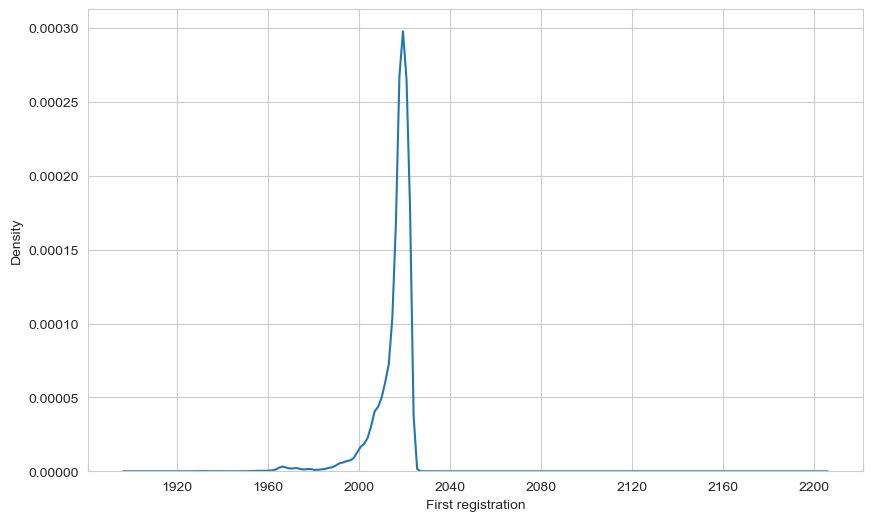

In [ ]:
sns.kdeplot(df['First registration'])
plt.show()

In [ ]:
df["First registration"].value_counts(dropna=False)

2022-08-01    454
2022-06-01    428
2019-05-01    420
2019-06-01    418
2019-07-01    416
2022-07-01    412
2018-06-01    396
2019-01-01    390
2022-05-01    375
2019-03-01    372
2018-05-01    366
2021-12-01    364
2018-03-01    353
2018-07-01    349
2019-04-01    323
2022-04-01    317
2021-06-01    316
2020-07-01    315
2022-09-01    313
2019-02-01    309
2018-01-01    299
2018-08-01    294
2019-08-01    285
2022-01-01    282
2021-03-01    278
2018-04-01    275
2021-05-01    270
2018-11-01    267
2022-03-01    263
2021-07-01    261
2018-02-01    260
2020-01-01    251
2017-04-01    249
2020-02-01    248
2017-03-01    247
2021-10-01    238
2018-10-01    233
2022-02-01    232
2017-05-01    231
2020-06-01    230
2017-06-01    229
2021-09-01    225
2018-12-01    223
2020-09-01    218
2020-11-01    215
2017-01-01    214
2020-12-01    214
2019-09-01    208
2017-11-01    207
2020-08-01    207
2017-07-01    205
2021-08-01    197
2017-09-01    189
2021-02-01    188
2017-10-01    187
2021-11-01

In [ ]:
# Gearbox

In [ ]:
df["Gearbox"].value_counts(dropna=False)

[\nManual\n]            17023
[\nAutomatic\n]         11287
NaN                       248
[\nSemi-automatic\n]       72
Name: Gearbox, dtype: int64

In [ ]:
df["Gearbox"]= df["Gearbox"].str[0].str.strip("\n")
df["Gearbox"].value_counts(dropna=False)

Manual            17023
Automatic         11287
NaN                 248
Semi-automatic       72
Name: Gearbox, dtype: int64

In [ ]:
#

In [ ]:
# Fuel type

In [ ]:
df['Fuel type'].value_counts(dropna=False)


Gasoline                                                                                              8532
Diesel                                                                                                5911
Super 95                                                                                              3557
Diesel (Particle filter)                                                                              2816
Regular/Benzine 91                                                                                    2065
NaN                                                                                                   1787
Super E10 95                                                                                          1016
Regular/Benzine 91 (Particle filter)                                                                   555
Super 95 (Particle filter)                                                                             537
Super E10 95 (Particle filter)       

In [ ]:
df = df.rename(columns={'Fuel type': 'fuel_type'})

In [ ]:
df["fuel_type"].str.split("/").value_counts(dropna=False)

[Gasoline]                                                                                                    8532
[Diesel]                                                                                                      5911
[Super 95]                                                                                                    3557
[Diesel (Particle filter)]                                                                                    2816
[Regular, Benzine 91]                                                                                         2065
NaN                                                                                                           1787
[Super E10 95]                                                                                                1016
[Regular, Benzine 91 (Particle filter)]                                                                        555
[Super 95 (Particle filter)]                                                    

In [ ]:
df["fuel_type"] = df["fuel_type"].str.split("/").str[0].str.strip()
df["fuel_type"]

7058     LPG (Particle filter)
9856                  Gasoline
19680                 Gasoline
6295                       LPG
11885                 Gasoline
                 ...          
21954                 Gasoline
22664        Super Plus E10 98
25488            Super Plus 98
683                   Gasoline
17219             Super E10 95
Name: fuel_type, Length: 28630, dtype: object

In [ ]:
df["fuel_type"] = df["fuel_type"].str.split("(").str[0].str.strip()
df["fuel_type"]

7058                   LPG
9856              Gasoline
19680             Gasoline
6295                   LPG
11885             Gasoline
               ...        
21954             Gasoline
22664    Super Plus E10 98
25488        Super Plus 98
683               Gasoline
17219         Super E10 95
Name: fuel_type, Length: 28630, dtype: object

In [ ]:
df['fuel_type'].value_counts(dropna=False)

Gasoline                8728
Diesel                  8727
Super 95                4097
Regular                 2906
NaN                     1787
Super E10 95            1340
Others                   213
Electric                 188
Super Plus 98            185
Liquid petroleum gas     165
CNG                       95
LPG                       77
Super Plus E10 98         77
Domestic gas H            25
Domestic gas L            13
Hydrogen                   3
Ethanol                    3
Biogas                     1
Name: fuel_type, dtype: int64

In [ ]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others", "Ethanol"]
petroleum_gas = ["Liquid petroleum gas", "CNG", "LPG", "Domestic gas H", "Domestic gas L", "Biogas", "Hydrogen"]

def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in petroleum_gas:
        return "Liquid/Natural Gas"
    else:
        return x

df["fuel_type"] = df["fuel_type"].apply(fueltype)

In [ ]:
df['fuel_type'].value_counts(dropna=False)

Benzine               17549
Diesel                 8727
NaN                    1787
Liquid/Natural Gas      379
Electric                188
Name: fuel_type, dtype: int64

In [ ]:
#

In [ ]:
# Colour

In [ ]:
df["Colour"].value_counts(dropna=False)

Black     6473
Grey      5998
White     5185
Blue      3478
Red       2242
NaN       1724
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: Colour, dtype: int64

In [ ]:
df.drop("Colour", axis=1, inplace=True)

In [ ]:
df["Paint"].value_counts(dropna=False)

Metallic     14494
NaN          14135
Uni/basic        1
Name: Paint, dtype: int64

In [ ]:
df.groupby('Paint')['price'].mean()


Paint
Metallic    26095.360
Uni/basic   12900.000
Name: price, dtype: float64

In [ ]:
df['price'].mean()

23555.202130632202

In [ ]:
# df.drop("Paint", axis=1, inplace=True), probably not very useful

In [ ]:
# desc

In [ ]:
df.desc

7058     [Marque: RENAULTModèle: CLIOVersion: 1.0 TCe 1...
9856     [Dit is toch hoe een leuke auto moet zijn. Rec...
19680    [Laat u niets wijsmaken, deze Nissan Micra C+C...
6295     [DEK:[6166069], DESCRIZIONE  DEL VEICOLO:, TEL...
11885    [VEICOLO NUOVO DA IMMATRICOLARE "KM ZERO";, GA...
                               ...                        
21954    [Véhicule unique, 1er propriétaire., Roule enc...
22664    [Getriebe:,  Automatik, Technik:,  Allrad, Bor...
25488    [Getriebe:,  Automatik, Technik:,  Bordcompute...
683      [Allumage automatique des feux de route, Antid...
17219    [Bijzonderheden:, Demonstratie auto met oplope...
Name: desc, Length: 28630, dtype: object

In [ ]:
# df.desc.value_counts(dropna=False) additional unspecific information about car in local languages

In [ ]:
df["desc"]= df["desc"].str[0].str.strip("\n")
df["desc"] = df["desc"].str.replace(",","")
df["desc"].value_counts(dropna=False)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            5271
Getriebe:                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
# df.drop("desc", axis=1, inplace=True)  # dropworthy?

In [ ]:
df["seller"].value_counts(dropna=False)

Dealer            26318
Private seller     2312
Name: seller, dtype: int64

In [ ]:
# Seats

In [ ]:
df["Seats"].value_counts(dropna=False)

[\n, 5, \n]     18308
[\n, 4, \n]      5390
NaN              3125
[\n, 2, \n]      1186
[\n, 7, \n]       488
[\n, 8, \n]        43
[\n, 9, \n]        35
[\n, 3, \n]        25
[\n, 6, \n]        12
[\n, 0, \n]         9
[\n, 1, \n]         7
[\n, 17, \n]        2
Name: Seats, dtype: int64

In [ ]:
df["Seats"]= df["Seats"].str[0].str.strip("\n")
df["Seats"] = df["Seats"].str.replace(",","")
df.Seats.value_counts()

 5      18308
 4       5390
 2       1186
 7        488
 8         43
 9         35
 3         25
 6         12
 0          9
 1          7
 17         2
Name: Seats, dtype: int64

In [ ]:
type(df["Seats"][1])

str

In [ ]:
df['Seats'] = df['Seats'].astype(str).str.extract('(\d+)').astype(float)
df['Seats']
df['Seats'].apply(lambda x: '{:.2f}'.format(x))  # turning integers into floats with 2 decimal places

  # turning integers into floats with 2 decimal places

7058     5.00
9856     4.00
19680    4.00
6295     5.00
11885    4.00
         ... 
21954    2.00
22664    5.00
25488    5.00
683      4.00
17219     nan
Name: Seats, Length: 28630, dtype: object

In [ ]:
# Power

In [ ]:
df["Power"]= df["Power"].str[0].str.strip("\n")
df["Power"] = df["Power"].str.replace(",","")
df["Power"].value_counts(dropna=False)

110 kW (150 hp)     1992
96 kW (131 hp)      1356
88 kW (120 hp)      1182
81 kW (110 hp)      1166
66 kW (90 hp)       1110
103 kW (140 hp)     1033
85 kW (116 hp)      1002
74 kW (101 hp)       892
140 kW (190 hp)      787
51 kW (69 hp)        701
70 kW (95 hp)        685
100 kW (136 hp)      681
NaN                  572
55 kW (75 hp)        515
92 kW (125 hp)       477
147 kW (200 hp)      458
125 kW (170 hp)      422
120 kW (163 hp)      418
80 kW (109 hp)       349
132 kW (179 hp)      339
90 kW (122 hp)       318
135 kW (184 hp)      296
173 kW (235 hp)      249
118 kW (160 hp)      247
115 kW (156 hp)      246
130 kW (177 hp)      241
84 kW (114 hp)       240
77 kW (105 hp)       236
221 kW (300 hp)      234
150 kW (204 hp)      232
206 kW (280 hp)      224
67 kW (91 hp)        213
82 kW (111 hp)       204
63 kW (86 hp)        200
145 kW (197 hp)      199
97 kW (132 hp)       185
53 kW (72 hp)        176
104 kW (141 hp)      163
288 kW (392 hp)      155
59 kW (80 hp)        149


In [ ]:
df['Power'] = df['Power'].astype(str).str.extract('(\d+) kW').astype(float)
# df['Power'].replace('nan', np.nan, inplace=True)
df['Power'].apply(lambda x: '{:.2f}'.format(x))  # turning integers into floats with 2 decimal places

7058        nan
9856     107.00
19680     81.00
6295      74.00
11885     63.00
          ...  
21954      1.00
22664    180.00
25488    103.00
683      320.00
17219    135.00
Name: Power, Length: 28630, dtype: object

In [ ]:
df = df.rename(columns={'Power': 'Power (kW)'})


In [ ]:


# df["Power"] = df.Power.replace("-", np.nan)



In [ ]:
# Engine size

In [ ]:
df["Engine size"].value_counts(dropna=False)

[\n1,598 cc\n]     2099
[\n999 cc\n]       2068
[\n1,969 cc\n]     1929
NaN                1403
[\n1,461 cc\n]     1110
[\n1,998 cc\n]     1000
[\n998 cc\n]        925
[\n1,199 cc\n]      867
[\n1,498 cc\n]      782
[\n1,997 cc\n]      665
[\n1,968 cc\n]      625
[\n1,984 cc\n]      580
[\n1,332 cc\n]      510
[\n1,798 cc\n]      473
[\n1,560 cc\n]      472
[\n898 cc\n]        405
[\n1,499 cc\n]      397
[\n1,197 cc\n]      382
[\n1,242 cc\n]      373
[\n1,995 cc\n]      352
[\n1,991 cc\n]      351
[\n1,368 cc\n]      348
[\n1,248 cc\n]      322
[\n2,435 cc\n]      302
[\n1,600 cc\n]      252
[\n2,143 cc\n]      242
[\n1,364 cc\n]      226
[\n1,500 cc\n]      210
[\n5,038 cc\n]      204
[\n3,982 cc\n]      203
[\n1,950 cc\n]      202
[\n1,591 cc\n]      201
[\n1,956 cc\n]      195
[\n2,000 cc\n]      191
[\n3,498 cc\n]      175
[\n1,395 cc\n]      174
[\n1,987 cc\n]      159
[\n1,149 cc\n]      157
[\n1,796 cc\n]      156
[\n3,696 cc\n]      154
[\n1,200 cc\n]      153
[\n1,490 cc\n]  

In [ ]:
df["Engine size"]= df["Engine size"].str[0].str.strip("\n")
df["Engine size"] = df["Engine size"].str.replace(",","")
df["Engine size"].value_counts(dropna=False)
df['Engine size'] = df['Engine size'].astype(str).str.extract('(\d+) cc').astype(float) # |
df['Engine size'] = df['Engine size'].apply(lambda x: '{:.2f}'.format(x) if pd.notna(x) else np.nan) # | keeps NaNs unchanged!
df['Engine size']


7058      999.00
9856     1368.00
19680    1598.00
6295      999.00
11885     875.00
          ...   
21954        NaN
22664    2000.00
25488    1580.00
683      2999.00
17219    1987.00
Name: Engine size, Length: 28630, dtype: object

In [ ]:
df['Engine size'] = df['Engine size'].astype(float)
df['Engine size']

7058     999.000
9856    1368.000
19680   1598.000
6295     999.000
11885    875.000
          ...   
21954        NaN
22664   2000.000
25488   1580.000
683     2999.000
17219   1987.000
Name: Engine size, Length: 28630, dtype: float64

In [ ]:
# Gears

In [ ]:
df.Gears.value_counts(dropna=False)

NaN         9676
[\n6\n]     8412
[\n5\n]     5335
[\n7\n]     1738
[\n8\n]     1690
[\n1\n]      712
[\n9\n]      642
[\n4\n]      256
[\n10\n]     112
[\n0\n]       31
[\n3\n]       24
[\n2\n]        2
Name: Gears, dtype: int64

In [ ]:
df["Gears"]= df["Gears"].str[0].str.strip("\n")
df["Gears"] = df["Gears"].str.replace(",","")
df["Gears"].value_counts(dropna=False)

NaN    9676
6      8412
5      5335
7      1738
8      1690
1       712
9       642
4       256
10      112
0        31
3        24
2         2
Name: Gears, dtype: int64

In [ ]:
df['Gears'] = df['Gears'].astype(float)
df['Gears']

7058      NaN
9856    5.000
19680   5.000
6295    6.000
11885   6.000
         ... 
21954     NaN
22664   8.000
25488   6.000
683     8.000
17219     NaN
Name: Gears, Length: 28630, dtype: float64

In [ ]:
#

In [ ]:
# Manufacturer colour

In [ ]:
df["Manufacturer colour"].value_counts(dropna=False) # colors in local languages, what to do with it???

NaN                          6963
Blanco                       1235
Gris                          671
Azul                          552
Negro                         546
                             ... 
Parelmoer wit                   1
Azul Chromet (metalizado)       1
Magnetic tech mattgrau          1
Schwarz Sonderlack              1
Manhattan Grey                  1
Name: Manufacturer colour, Length: 4963, dtype: int64

In [ ]:
# Drivetrain

In [ ]:
df["Drivetrain"].value_counts(dropna=False)

[\n, Front, \n]    12066
NaN                11737
[\n, 4WD, \n]       3252
[\n, Rear, \n]      1575
Name: Drivetrain, dtype: int64

In [ ]:
df["Drivetrain"]= df["Drivetrain"].str[0].str.strip("\n")
df["Drivetrain"] = df["Drivetrain"].str.replace(",","")
df["Drivetrain"].value_counts(dropna=False)


 Front     12066
NaN        11737
 4WD        3252
 Rear       1575
Name: Drivetrain, dtype: int64

In [ ]:
# Cylinders

In [ ]:
df.Cylinders.value_counts(dropna=False)

[\n4\n]     13068
NaN          9778
[\n3\n]      3258
[\n6\n]      1013
[\n5\n]       799
[\n8\n]       539
[\n2\n]       103
[\n0\n]        35
[\n1\n]        21
[\n12\n]        8
[\n7\n]         6
[\n26\n]        1
[\n16\n]        1
Name: Cylinders, dtype: int64

In [ ]:
df["Cylinders"]= df["Cylinders"].str[0].str.strip("\n")
df["Cylinders"] = df["Cylinders"].str.replace(",","")
df["Cylinders"].value_counts(dropna=False)
df['Cylinders'] = df['Cylinders'].apply(lambda x: '{:.2f}'.format(float(x)) if pd.notna(x) else np.nan)
df['Cylinders']

7058      NaN
9856     4.00
19680    4.00
6295     3.00
11885    2.00
         ... 
21954     NaN
22664    4.00
25488    4.00
683       NaN
17219    4.00
Name: Cylinders, Length: 28630, dtype: object

In [ ]:
df['Cylinders'] = df['Cylinders'].astype(float)
df['Cylinders']

7058      NaN
9856    4.000
19680   4.000
6295    3.000
11885   2.000
         ... 
21954     NaN
22664   4.000
25488   4.000
683       NaN
17219   4.000
Name: Cylinders, Length: 28630, dtype: float64

In [ ]:
# Fuel consumption

In [ ]:


df["Fuel consumption"].value_counts(dropna=False)  # ??? separate different ranges?



NaN                                                                          5245
[[0 l/100 km (comb.)]]                                                        330
[[0 l/100 km (comb.)], [0 l/100 km (city)], [0 l/100 km (country)]]           306
[[3.4 l/100 km (comb.)], [3.7 l/100 km (city)], [3.2 l/100 km (country)]]     170
[[4 l/100 km (comb.)]]                                                        149
                                                                             ... 
[[11 l/100 km (comb.)], [17 l/100 km (city)], [8.8 l/100 km (country)]]         1
[[5.6 l/100 km (comb.)], [6.6 l/100 km (city)], [5.5 l/100 km (country)]]       1
[[5.6 l/100 km (comb.)], [6.2 l/100 km (city)], [4.9 l/100 km (country)]]       1
[[6.5 l/100 km (comb.)], [7.3 l/100 km (city)], [5.2 l/100 km (country)]]       1
[[8.3 l/100 km (comb.)], [9.2 l/100 km (city)], [8.6 l/100 km (country)]]       1
Name: Fuel consumption, Length: 3453, dtype: int64

In [ ]:
def extract_first_number(lst):
    if isinstance(lst, list) and lst:  # check if lst is non-empty list
        first_item = lst[0]
        if isinstance(first_item, list) and first_item:  # check if first_item is non-empty list
            first_string = first_item[0]
            try:
                number_str = first_string.split(" ")[0]  # split by space and take first part
                return float(number_str)
            except ValueError:
                return np.nan
    return np.nan

df['Fuel_cons_comb'] = df['Fuel consumption'].apply(extract_first_number)
df['Fuel_cons_comb']

7058      NaN
9856    6.000
19680     NaN
6295    5.100
11885     NaN
         ... 
21954     NaN
22664   8.300
25488   1.100
683       NaN
17219     NaN
Name: Fuel_cons_comb, Length: 28630, dtype: float64

In [ ]:
# \nComfort & Convenience\n

In [ ]:
df = df.rename(columns={"\nComfort & Convenience\n": "comfort_&_convenience"})  # | renaming the column title

In [ ]:
# [item[0] if type(item) == list else item for item in df["comfort_&_convenience"]]

df["comfort_&_convenience"] = [", ".join(item) if type(item) == list else item for item in df["comfort_&_convenience"]]

In [ ]:
df["comfort_&_convenience"].value_counts(dropna=False).head()

NaN                                                                                                                                   3197
Air conditioning, Automatic climate control, Electrical side mirrors, Multi-function steering wheel, Power windows                     244
Air conditioning, Automatic climate control, Cruise control                                                                            171
Air conditioning, Automatic climate control, Cruise control, Electrical side mirrors, Multi-function steering wheel, Power windows     168
Air conditioning                                                                                                                       157
Name: comfort_&_convenience, dtype: int64

In [ ]:
#

In [ ]:
# Entertainment & Media

In [ ]:
# df['Entertainment & Media']=df['\nEntertainment & Media\n']

In [ ]:
df = df.rename(columns={"\nEntertainment & Media\n": "entertainment_&_media"})  # | renaming the column title

In [ ]:
df["entertainment_&_media"].value_counts(dropna="False")

[Bluetooth, USB]                                                                                                                                   753
[Bluetooth]                                                                                                                                        665
[On-board computer]                                                                                                                                662
[CD player, On-board computer, Radio]                                                                                                              644
[Radio]                                                                                                                                            425
                                                                                                                                                  ... 
[CD player, Induction charging for smartphones, On-board computer, Radio, Sound system]       

In [ ]:
# [item[0] if type(item) == list else item for item in df["entertainment_&_media"]]

df["entertainment_&_media"] = [", ".join(item) if type(item) == list else item for item in df["entertainment_&_media"]]

In [ ]:
#

In [ ]:
# \nExtras\n

In [ ]:
df = df.rename(columns={"\nExtras\n": "extras"})  # | renaming the column title

In [ ]:
df["extras"] = [", ".join(item) if type(item) == list else item for item in df["extras"]]

In [ ]:
df["extras"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                              5150
Alloy wheels                                                                                                                                                                                                                                                     3408
Alloy wheels, Roof rack                                                                                                                                                                                                                                           380
Alloy wheels, Sport seats                                                                                                                                                                                             

In [ ]:
# \nSafety & Security\n'

In [ ]:
df = df.rename(columns={"\nSafety & Security\n": "safety_&_security"})  # | renaming the column title

In [ ]:
df["safety_&_security"] = [", ".join(item) if type(item) == list else item for item in df["safety_&_security"]]

In [ ]:
df["safety_&_security"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          3215
Isofix                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        380
ABS, Central door lock, Driver-side 

In [ ]:
#

In [ ]:

# Empty weight

In [ ]:
df["Empty weight"].value_counts(dropna=False) # |||| getting rid of the []\n,






NaN               10872
[\n1,395 kg\n]      233
[\n1,055 kg\n]      224
[\n1,423 kg\n]      216
[\n1,165 kg\n]      200
                  ...  
[\n1,839 kg\n]        1
[\n1,046 kg\n]        1
[\n2,725 kg\n]        1
[\n943 kg\n]          1
[\n1,857 kg\n]        1
Name: Empty weight, Length: 1219, dtype: int64

In [ ]:
df["Empty weight"]= df["Empty weight"].str[0].str.strip("\n")

In [ ]:
df["Empty weight"] = df["Empty weight"].str.replace(",","").str.rstrip(" kg")

In [ ]:
df["Empty weight"]= df["Empty weight"].astype("float")  # not "int", then: cannot convert float NaN to integer

In [ ]:
df["Empty weight"].value_counts(dropna=False)

NaN         10872
1395.000      233
1055.000      224
1423.000      216
1165.000      200
            ...  
1839.000        1
1046.000        1
2725.000        1
943.000         1
1857.000        1
Name: Empty weight, Length: 1219, dtype: int64

In [ ]:
df['Empty weight'] = df['Empty weight'].astype(float)
df['Empty weight']

7058         NaN
9856    1010.000
19680   1125.000
6295         NaN
11885   1125.000
          ...   
21954        NaN
22664        NaN
25488   1626.000
683          NaN
17219   1315.000
Name: Empty weight, Length: 28630, dtype: float64

In [ ]:
# df.drop("Empty weight", axis=1, inplace=True)



In [ ]:
df["Model code"].value_counts()

[\n, 8212/AFJ, \n]    75
[\n, 1727/AAM, \n]    64
[\n, 1349/AGI, \n]    61
[\n, 1889/ABU, \n]    55
[\n, 7104/AAL, \n]    53
                      ..
[\n, 0035/BHM, \n]     1
[\n, 8212/AZC, \n]     1
[\n, 1313/HOU, \n]     1
[\n, 0035/BKX, \n]     1
[\n, 3003/000, \n]     1
Name: Model code, Length: 2186, dtype: int64

In [ ]:
df["Model code"]= df["Model code"].str[0].str.strip("\n")

In [ ]:
df["Model code"] = df["Model code"].str.replace(",","")

In [ ]:
df["Model code"].value_counts(dropna=False)

NaN           20263
 8212/AFJ        75
 1727/AAM        64
 1349/AGI        61
 1889/ABU        55
              ...  
 1313/FIA         1
 1889/AEL         1
 8566/BPI         1
 5013/AJU         1
 3003/000         1
Name: Model code, Length: 2187, dtype: int64

In [ ]:
# General inspection - reconsider splitting it up in three categories

In [ ]:
import datetime # we will need it for the next column

In [ ]:
df["General inspection"].value_counts(dropna=False)

NaN        16376
New         5883
05/2023      286
08/2023      280
03/2023      268
06/2023      266
04/2023      262
09/2023      255
07/2023      254
06/2024      216
05/2024      212
01/2023      210
02/2023      209
03/2024      207
07/2024      203
08/2024      187
09/2024      182
11/2023      176
01/2024      164
02/2024      163
04/2024      162
12/2023      160
12/2022      159
10/2023      155
06/2025      147
11/2022      131
08/2025      122
07/2025      110
09/2022       96
03/2025       95
05/2025       93
10/2022       90
04/2025       89
01/2025       75
02/2025       66
09/2025       65
08/2022       64
10/2024       64
12/2024       61
11/2024       50
06/2022       42
07/2022       41
04/2022       34
03/2022       25
05/2022       22
10/2021       17
11/2021       11
01/2022       10
07/2021       10
09/2021        8
08/2021        7
12/2021        7
02/2022        6
07/2020        5
05/2026        5
06/2026        4
05/2021        4
10/2025        4
12/2019       

In [ ]:
# there are dates in the past and dates in the future. I will create two columns accordingly: df['Last inspection'] and df['Next inspection']

In [ ]:
# || Convert 'General inspection' to datetime, but don't convert 'New'
df["General inspection"] = df["General inspection"].apply(lambda x: pd.to_datetime(x, errors='coerce') if x != "New" else x)

# If "New" or other non-date strings are possible values and should be treated as NaN, we add the errors='coerce' argument to the
# to_datetime() function. This will force pandas to convert unparseable strings to NaT (Not a Time, the pandas equivalent of NaN
# for datetime objects).

# Create the 'Last inspection', 'Next inspection', and 'New' columns. ||| Checks if date is in the past or in the future
df['Last inspection'] = df['General inspection'].apply(lambda x: x if isinstance(x, pd.Timestamp) and x < datetime.datetime.now() else np.nan)
df['Next inspection'] = df['General inspection'].apply(lambda x: x if isinstance(x, pd.Timestamp) and x > datetime.datetime.now() else np.nan)
df['New'] = df['General inspection'].apply(lambda x: 'Yes' if x == "New" else np.nan)


In [ ]:
df["Last inspection"].value_counts(dropna=False)

NaT           26303
2023-05-01      286
2023-03-01      268
2023-06-01      266
2023-04-01      262
2023-01-01      210
2023-02-01      209
2022-12-01      159
2022-11-01      131
2022-09-01       96
2022-10-01       90
2022-08-01       64
2022-06-01       42
2022-07-01       41
2022-04-01       34
2022-03-01       25
2022-05-01       22
2021-10-01       17
2021-11-01       11
2021-07-01       10
2022-01-01       10
2021-09-01        8
2021-12-01        7
2021-08-01        7
2022-02-01        6
2020-07-01        5
2021-05-01        4
2019-12-01        4
2020-11-01        3
2021-01-01        3
2021-06-01        3
2021-02-01        2
2020-12-01        2
2020-06-01        2
2020-10-01        1
2018-08-01        1
2020-09-01        1
2019-11-01        1
2018-01-01        1
2020-08-01        1
2018-05-01        1
2017-09-01        1
2013-08-01        1
2020-04-01        1
2017-07-01        1
2019-08-01        1
2019-07-01        1
2020-01-01        1
2021-03-01        1
2020-05-01        1


In [ ]:
df["Next inspection"].value_counts(dropna=False)

NaT           24586
2023-08-01      280
2023-09-01      255
2023-07-01      254
2024-06-01      216
2024-05-01      212
2024-03-01      207
2024-07-01      203
2024-08-01      187
2024-09-01      182
2023-11-01      176
2024-01-01      164
2024-02-01      163
2024-04-01      162
2023-12-01      160
2023-10-01      155
2025-06-01      147
2025-08-01      122
2025-07-01      110
2025-03-01       95
2025-05-01       93
2025-04-01       89
2025-01-01       75
2025-02-01       66
2025-09-01       65
2024-10-01       64
2024-12-01       61
2024-11-01       50
2026-05-01        5
2026-06-01        4
2025-10-01        4
2026-04-01        3
2025-12-01        2
2026-01-01        2
2026-02-01        2
2026-07-01        2
2026-08-01        2
2026-09-01        2
2027-02-01        2
2026-03-01        1
Name: Next inspection, dtype: int64

In [ ]:
df["New"].value_counts()

Yes    5883
Name: New, dtype: int64

In [ ]:
df["New"]

7058     NaN
9856     NaN
19680    NaN
6295     NaN
11885    NaN
        ... 
21954    NaN
22664    NaN
25488    NaN
683      NaN
17219    NaN
Name: New, Length: 28630, dtype: object

In [ ]:
# df.drop("General inspection", axis=1, inplace=True)  # and drop df["General inspection"]

In [ ]:
# Full service history

In [ ]:
# Last service

In [ ]:
df["Last service"].value_counts(dropna=False)

NaN        26627
09/2022      220
08/2022      196
06/2022      164
07/2022      155
05/2022      151
03/2022      134
04/2022      129
01/2022       98
02/2022       91
12/2021       70
10/2021       69
06/2021       62
09/2021       62
07/2021       51
11/2021       47
08/2021       38
05/2021       32
03/2021       26
04/2021       24
01/2021       17
07/2020       15
02/2021       14
11/2020       14
10/2020       14
01/2020       13
09/2020        8
05/2020        8
12/2020        7
05/2019        7
10/2019        7
06/2020        6
08/2020        6
10/2022        6
09/2018        5
04/2020        3
03/2020        3
01/2018        3
05/2018        2
06/2019        2
01/2019        2
07/2019        2
06/2017        1
08/2019        1
11/1988        1
06/2018        1
10/2013        1
07/2017        1
04/2017        1
02/2016        1
02/2011        1
11/2019        1
01/2012        1
08/2010        1
08/2017        1
02/2007        1
09/2016        1
03/2017        1
02/2019       

In [ ]:
# column dropworthy, mainly NaNs

In [ ]:
# Full service history

In [ ]:
df["Full service history"].value_counts(dropna=False)

NaN    16065
Yes    12565
Name: Full service history, dtype: int64

In [ ]:
df["Full service history"]

7058     NaN
9856     Yes
19680    NaN
6295     NaN
11885    NaN
        ... 
21954    Yes
22664    NaN
25488    Yes
683      NaN
17219    Yes
Name: Full service history, Length: 28630, dtype: object

In [ ]:
df['Full service history'] = df['Full service history'].apply(lambda x: 1.0 if x == 'Yes' else 0.0)
df['Full service history']

7058    0.000
9856    1.000
19680   0.000
6295    0.000
11885   0.000
         ... 
21954   1.000
22664   0.000
25488   1.000
683     0.000
17219   1.000
Name: Full service history, Length: 28630, dtype: float64

In [ ]:
# Non-smoker vehicle

In [ ]:
df["Non-smoker vehicle"].value_counts(dropna=False)

NaN    17036
Yes    11594
Name: Non-smoker vehicle, dtype: int64

In [ ]:
df["Non-smoker vehicle"].sample(10)  # only "Yes" and NaNs (= we don't know)

24818    Yes
9890     NaN
14213    NaN
8346     NaN
28765    Yes
4231     NaN
12385    Yes
2468     Yes
9861     NaN
5178     NaN
Name: Non-smoker vehicle, dtype: object

In [ ]:
# Emission class

In [ ]:
df["Emission class"].value_counts(dropna=False)

NaN             10771
Euro 6           6418
Euro 6d-TEMP     3399
Euro 6d          2858
Euro 5           2389
Euro 4           1743
Euro 3            523
Euro 2            217
Euro 1            172
Euro 6c           140
Name: Emission class, dtype: int64

In [ ]:
df["Emission class"]

7058              NaN
9856           Euro 6
19680             NaN
6295           Euro 6
11885    Euro 6d-TEMP
             ...     
21954             NaN
22664         Euro 6d
25488         Euro 6d
683            Euro 6
17219          Euro 1
Name: Emission class, Length: 28630, dtype: object

In [ ]:
df["Emission class"].replace({"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}, inplace=True)  # || categorization
df["Emission class"].value_counts(dropna=False)

Euro 6    12815
NaN       10771
Euro 5     2389
Euro 4     1743
Euro 3      523
Euro 2      217
Euro 1      172
Name: Emission class, dtype: int64

In [ ]:
# Emissions sticker
first_looking("Emissions sticker")  # not very useful, drop

column name    :  Emissions sticker
--------------------------------
per_of_nulls   :  % 67.12
num_of_nulls   :  19216
num_of_uniques :  5
--------------------------------
NaN               19216
4 (Green)          9230
1 (No sticker)      176
3 (Yellow)            6
2 (Red)               2
Name: Emissions sticker, dtype: int64


In [ ]:
df["Emissions sticker"].value_counts(dropna=False)

NaN               19216
4 (Green)          9230
1 (No sticker)      176
3 (Yellow)            6
2 (Red)               2
Name: Emissions sticker, dtype: int64

In [ ]:
# Upholstery colour

In [ ]:
df["Upholstery colour"].value_counts(dropna=False)

NaN       14061
Black     10416
Grey       2038
Other      1003
Beige       466
Brown       275
Red         159
White        93
Blue         82
Orange       23
Green         8
Yellow        6
Name: Upholstery colour, dtype: int64

In [ ]:
#

In [ ]:
# Upholstery

In [ ]:
df["Upholstery"].value_counts(dropna=False)

NaN             10020
Cloth            8736
Full leather     5439
Part leather     2835
alcantara         764
Other             628
Velour            208
Name: Upholstery, dtype: int64

In [ ]:
#

In [ ]:
# Production date

In [ ]:
df["Production date"].value_counts(dropna=False)

NaN         22722
2019.000     1179
2021.000      980
2022.000      894
2020.000      763
2018.000      762
2017.000      391
2016.000      239
2015.000      118
2014.000       90
2013.000       76
2010.000       53
2012.000       43
2011.000       43
2008.000       34
2009.000       26
2007.000       20
2006.000       17
2002.000       15
2004.000       13
2003.000       13
1967.000       12
2001.000       12
1966.000       11
1965.000        9
1999.000        9
2005.000        9
1970.000        9
1994.000        8
1997.000        8
1968.000        7
2000.000        7
1998.000        5
1990.000        3
1987.000        3
1991.000        3
1993.000        3
1973.000        3
1996.000        3
1982.000        2
1978.000        2
1995.000        2
1969.000        2
1962.000        1
1961.000        1
1981.000        1
1976.000        1
1985.000        1
1988.000        1
1954.000        1
Name: Production date, dtype: int64

In [ ]:
# production date is redundant, since we use first registration

In [ ]:
#

In [ ]:
# Previous owner

In [ ]:
first_looking("Previous owner")

column name    :  Previous owner
--------------------------------
per_of_nulls   :  % 51.05
num_of_nulls   :  14615
num_of_uniques :  11734
--------------------------------
NaN                          14615
[[50 km, 06/2022], 1]           64
[[10 km, 08/2022], 1]           59
[[10 km, 07/2022], 1]           45
[[10 km, 09/2022], 1]           38
                             ...  
[[43,724 km, 08/2019], 1]        1
[[45,338 km, 08/2019], 2]        1
[[15,900 km, 08/2019], 2]        1
[[45,700 km, 08/2019], 3]        1
[[29,961 km, 01/1900], 1]        1
Name: Previous owner, Length: 11734, dtype: int64


In [ ]:
# df["Previous owner"].value_counts(dropna=False)  # should we introduce a second column? it takes ages to run the code

In [ ]:
def extract_last_number(lst):
    if isinstance(lst, list) and lst:
        last_item = lst[-1]
        number_str = last_item.split(", ")[-1].replace("]", "")
        try:
            return float(number_str)
        except ValueError:
            return np.nan
    else:
        return np.nan

df['Nr_of_prev_owners'] = df['Previous owner'].apply(extract_last_number)
df['Nr_of_prev_owners']
first_looking("Nr_of_prev_owners")

column name    :  Nr_of_prev_owners
--------------------------------
per_of_nulls   :  % 51.05
num_of_nulls   :  14615
num_of_uniques :  14
--------------------------------
NaN       14615
1.000      9746
2.000      3221
3.000       699
4.000       184
5.000        69
6.000        37
7.000        22
8.000        16
9.000        14
12.000        3
10.000        2
14.000        1
13.000        1
Name: Nr_of_prev_owners, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28630 entries, 7058 to 17219
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   make_model                28630 non-null  object        
 1   short_description         28629 non-null  object        
 2   make                      28630 non-null  object        
 3   model                     28630 non-null  object        
 4   location                  28630 non-null  object        
 5   price                     28630 non-null  float64       
 6   Body type                 28630 non-null  object        
 7   Type                      28630 non-null  object        
 8   Doors                     28271 non-null  float64       
 9   Country version           16889 non-null  object        
 10  Offer number              23100 non-null  object        
 11  Warranty                  13465 non-null  float64       
 12  Mileage        

In [ ]:
# Other fuel types

In [ ]:
df["Other fuel types"].value_counts(dropna=False)


NaN             26317
Electricity      2301
Hydogen            11
Super E10 95        1
Name: Other fuel types, dtype: int64

In [ ]:
# dropworthy, mainly NaNs

In [ ]:
# Power consumption

In [ ]:
df["Power consumption"].value_counts(dropna=False)

NaN                        28115
0 kWh/100 km (comb.)         101
15.2 kWh/100 km (comb.)       30
15.7 kWh/100 km (comb.)       19
17.7 kWh/100 km (comb.)       17
15.9 kWh/100 km (comb.)       14
18.1 kWh/100 km (comb.)       13
16.8 kWh/100 km (comb.)       11
14.9 kWh/100 km (comb.)       11
10 kWh/100 km (comb.)         11
15.8 kWh/100 km (comb.)       11
20.5 kWh/100 km (comb.)        9
16.1 kWh/100 km (comb.)        9
18.7 kWh/100 km (comb.)        9
16.9 kWh/100 km (comb.)        8
14 kWh/100 km (comb.)          8
16.3 kWh/100 km (comb.)        8
17.3 kWh/100 km (comb.)        8
17 kWh/100 km (comb.)          7
14.7 kWh/100 km (comb.)        7
16 kWh/100 km (comb.)          7
14.8 kWh/100 km (comb.)        6
17.8 kWh/100 km (comb.)        6
16.5 kWh/100 km (comb.)        6
17.5 kWh/100 km (comb.)        6
3.4 kWh/100 km (comb.)         5
17.2 kWh/100 km (comb.)        5
13.9 kWh/100 km (comb.)        5
99.9 kWh/100 km (comb.)        5
15.6 kWh/100 km (comb.)        4
3.8 kWh/10

In [ ]:
# dropworthy, mainly NaNs,important information, but redundant since data also in Fuel consumption column

In [ ]:
# Energy efficiency class

In [ ]:
df["Energy efficiency class"].value_counts(dropna=False)

NaN     20826
B        2090
A        1687
C        1133
A+       1089
D         636
A+++      375
G         309
E         271
F         147
A++        67
Name: Energy efficiency class, dtype: int64

In [ ]:
# CO₂-efficiency

In [ ]:
df["CO₂-efficiency"].value_counts(dropna=False)

NaN                                                                                           20826
Calculated on basis of measured CO₂-emissions taking into account the mass of the vehicle.     7804
Name: CO₂-efficiency, dtype: int64

In [ ]:
# df.drop("CO₂-efficiency", axis=1, inplace=True)  # drop it, no real information

In [ ]:
# Fuel consumption (WLTP)

In [ ]:
df["Fuel consumption (WLTP)"].value_counts(dropna=False)

NaN              28530
5.5 l/100 km         9
5 l/100 km           8
5.4 l/100 km         5
6.8 l/100 km         5
6.5 l/100 km         4
7.3 l/100 km         4
5.7 l/100 km         4
5.2 l/100 km         3
6.7 l/100 km         3
4.9 l/100 km         3
6.6 l/100 km         3
5.9 l/100 km         2
5.8 l/100 km         2
5.6 l/100 km         2
4.4 l/100 km         2
7.6 l/100 km         2
4.7 l/100 km         2
12.6 l/100 km        2
16 l/100 km          2
6.3 l/100 km         2
8.4 l/100 km         2
6.1 l/100 km         2
6.2 l/100 km         2
9.3 l/100 km         2
12.2 l/100 km        1
10.3 l/100 km        1
3.9 l/100 km         1
7.2 l/100 km         1
12 l/100 km          1
6.4 l/100 km         1
8.6 l/100 km         1
7.8 l/100 km         1
4.2 l/100 km         1
1.5 l/100 km         1
10.4 l/100 km        1
4.1 l/100 km         1
5.3 l/100 km         1
1.1 l/100 km         1
4.8 l/100 km         1
4.3 l/100 km         1
8.2 l/100 km         1
8 l/100 km           1
8.3 l/100 k

In [ ]:
# dropworthy, mainly NaNs,important information, but redundant since data also in Fuel consumption column as well as power consumption


In [ ]:
#

In [ ]:
# CO₂-efficiency

In [ ]:
df["CO₂-efficiency"].value_counts(dropna=False)

NaN                                                                                           20826
Calculated on basis of measured CO₂-emissions taking into account the mass of the vehicle.     7804
Name: CO₂-efficiency, dtype: int64

In [ ]:
# Available from

In [ ]:
df["Available from"].value_counts(dropna=False)

NaN                     28237
[\n, 01/03/2023, \n]       34
[\n, 01/10/2026, \n]       23
[\n, 31/03/2023, \n]       17
[\n, 08/10/2022, \n]       15
[\n, 15/10/2022, \n]       13
[\n, 28/02/2023, \n]       13
[\n, 15/12/2022, \n]       11
[\n, 07/10/2022, \n]       11
[\n, 15/11/2022, \n]       10
[\n, 15/01/2023, \n]        9
[\n, 06/11/2022, \n]        8
[\n, 01/11/2022, \n]        7
[\n, 30/11/2022, \n]        7
[\n, 01/12/2022, \n]        7
[\n, 30/10/2022, \n]        6
[\n, 20/10/2022, \n]        6
[\n, 12/12/2022, \n]        6
[\n, 23/11/2022, \n]        5
[\n, 07/12/2022, \n]        5
[\n, 19/12/2022, \n]        5
[\n, 03/11/2022, \n]        4
[\n, 31/10/2022, \n]        4
[\n, 31/01/2023, \n]        4
[\n, 20/12/2022, \n]        4
[\n, 28/12/2022, \n]        4
[\n, 20/01/2023, \n]        3
[\n, 24/11/2022, \n]        3
[\n, 27/09/2023, \n]        3
[\n, 09/10/2022, \n]        3
[\n, 09/11/2022, \n]        3
[\n, 24/12/2022, \n]        3
[\n, 16/01/2023, \n]        3
[\n, 04/11

In [ ]:
df["Available from"]= df["Available from"].str[0].str.strip("\n")
df["Available from"] = df["Available from"].str.replace(",","")
df["Available from"].value_counts(dropna=False)


NaN             28237
 01/03/2023        34
 01/10/2026        23
 31/03/2023        17
 08/10/2022        15
 15/10/2022        13
 28/02/2023        13
 15/12/2022        11
 07/10/2022        11
 15/11/2022        10
 15/01/2023         9
 06/11/2022         8
 01/11/2022         7
 30/11/2022         7
 01/12/2022         7
 30/10/2022         6
 20/10/2022         6
 12/12/2022         6
 23/11/2022         5
 07/12/2022         5
 19/12/2022         5
 03/11/2022         4
 31/10/2022         4
 31/01/2023         4
 20/12/2022         4
 28/12/2022         4
 20/01/2023         3
 24/11/2022         3
 27/09/2023         3
 09/10/2022         3
 09/11/2022         3
 24/12/2022         3
 16/01/2023         3
 04/11/2022         3
 01/11/2023         3
 20/09/2023         3
 01/04/2023         3
 16/12/2022         3
 13/12/2022         3
 17/05/2023         3
 05/12/2022         3
 02/02/2023         2
 31/12/2022         2
 02/12/2022         2
 11/02/2023         2
 05/11/202

In [ ]:
# dropworthy, mainly NaNs

In [ ]:
# Taxi or rental car

In [ ]:
df["Taxi or rental car"].value_counts(dropna=False)

NaN    28208
Yes      422
Name: Taxi or rental car, dtype: int64

In [ ]:
# dropworthy, almost completely NaNs

In [ ]:
# Availability

In [ ]:
df["Availability"].value_counts(dropna=False)

NaN                                  28329
[\n, in 1 day after order, \n]          64
[\n, in 5 days after order, \n]         56
[\n, in 7 days after order, \n]         31
[\n, in 3 days after order, \n]         25
[\n, in 14 days after order, \n]        22
[\n, in 60 days after order, \n]        21
[\n, in 42 days after order, \n]        15
[\n, in 180 days after order, \n]       12
[\n, in 90 days after order, \n]        10
[\n, in 120 days after order, \n]       10
[\n, in 6 days after order, \n]          9
[\n, in 270 days after order, \n]        8
[\n, in 28 days after order, \n]         5
[\n, in 2 days after order, \n]          5
[\n, in 4 days after order, \n]          4
[\n, in 21 days after order, \n]         2
[\n, in 150 days after order, \n]        1
[\n, in 360 days after order, \n]        1
Name: Availability, dtype: int64

In [ ]:
df["Availability"]= df["Availability"].str[0].str.strip("\n")
df["Availability"] = df["Availability"].str.replace(",","")
df["Availability"].value_counts(dropna=False)


NaN                          28329
 in 1 day after order           64
 in 5 days after order          56
 in 7 days after order          31
 in 3 days after order          25
 in 14 days after order         22
 in 60 days after order         21
 in 42 days after order         15
 in 180 days after order        12
 in 90 days after order         10
 in 120 days after order        10
 in 6 days after order           9
 in 270 days after order         8
 in 28 days after order          5
 in 2 days after order           5
 in 4 days after order           4
 in 21 days after order          2
 in 150 days after order         1
 in 360 days after order         1
Name: Availability, dtype: int64

In [ ]:
# dropworthy, almost completely NaNs

In [ ]:
# Last timing belt change

In [ ]:
df["Last timing belt change"].value_counts(dropna=False)


NaN        28058
04/2022       27
05/2021       26
08/2022       25
07/2022       24
07/2021       22
06/2021       19
03/2022       19
05/2022       19
09/2022       17
06/2022       17
10/2021       15
09/2021       14
02/2022       14
01/2021       13
05/2020       13
07/2020       12
08/2020       11
01/2022       10
10/2020       10
09/2020       10
01/2018       10
07/2019       10
04/2021       10
12/2020        9
08/2021        9
06/2020        9
04/2020        8
04/2019        8
05/2019        7
08/2017        7
03/2020        7
06/2019        7
03/2018        6
03/2021        6
09/2019        6
11/2021        6
11/2019        6
12/2018        5
01/2017        5
01/2019        4
08/2018        4
12/2021        4
10/2018        4
02/2021        4
09/2018        4
12/2017        4
06/2016        3
10/2016        3
04/2017        3
05/2017        3
09/2017        3
05/2018        3
06/2018        3
01/2020        3
02/2020        3
06/2017        2
03/2019        2
12/2016       

In [ ]:
# dropworthy, almost completely NaNs

In [ ]:
# Electric Range (WLTP)

In [ ]:
df["Electric Range (WLTP)"].value_counts(dropna=False)

NaN                           28614
426 km492 km (within city)        2
389 km                            2
573 km573 km (within city)        1
50 km50 km (within city)          1
351 km351 km (within city)        1
384 km                            1
450 km450 km (within city)        1
360 km                            1
614 km681 km (within city)        1
402 km402 km (within city)        1
402 km484 km (within city)        1
48 km48 km (within city)          1
691 km691 km (within city)        1
540 km540 km (within city)        1
Name: Electric Range (WLTP), dtype: int64

In [ ]:
# dropworthy, almost completely NaNs

In [ ]:
# Power consumption (WLTP)

In [ ]:
df["Power consumption (WLTP)"].value_counts(dropna=False)

NaN                28614
21.9 kWh/100 km        2
17.2 kWh/100 km        2
20.6 kWh/100 km        2
18.4 kWh/100 km        1
19.2 kWh/100 km        1
15.9 kWh/100 km        1
18.6 kWh/100 km        1
16.9 kWh/100 km        1
18.1 kWh/100 km        1
18.9 kWh/100 km        1
148 kWh/100 km         1
19.3 kWh/100 km        1
18.7 kWh/100 km        1
Name: Power consumption (WLTP), dtype: int64

In [ ]:
# dropworthy, almost completely NaNs, information, even column Power consumption has more data

In [ ]:
# Battery ownership

In [ ]:
df["Battery Ownership"].value_counts(dropna=False)

NaN         28623
Included        7
Name: Battery Ownership, dtype: int64

In [ ]:
# dropworthy, almost completely NaNs

In [ ]:
# Column titles all in lowercase and connected by "_"

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'paint', 'desc', 'seller', 'seats', 'power_(kw)', 'engine_size',
       'gears', 'co₂-emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_&_convenience',
       'entertainment_&_media', 'safety_&_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non-smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co₂-efficiency',
       'fuel_consumption_(wltp)', 'co₂-emissions_(wltp)', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       '

In [ ]:
df.head(5).T

,7058,9856,19680,6295,11885
make_model,Renault Clio,Fiat 500 Abarth,Nissan Micra,Renault Captur,Fiat Panda
short_description,1.0 TCe 100ch Evolution GPL,1.4 T-Jet 595,C+C 1.6 Spicy 147d km airco panorama dak nieuw...,TCe 12V 100 CV GPL Equilibre ((Promo Finanziament,"4x4 0.9 TwinAir Turbo ""DISPONIBILE"""
make,Renault,Fiat,Nissan,Renault,Fiat
model,"[\n, Clio ,\n]","[\n, 500 Abarth ,\n]","[\n, Micra ,\n]","[\n, Captur ,\n]","[\n, Panda ,\n]"
location,FR,NL,NL,IT,IT
price,16990.000,17995.000,3250.000,22400.000,18690.000
body_type,Sedan,Compact,Convertible,Off-Road/Pick-up,Sedan
type,Used,Used,Used,Pre-registered,Pre-registered
doors,5.000,3.000,2.000,5.000,5.000
country_version,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.price

7058     16990.000
9856     17995.000
19680     3250.000
6295     22400.000
11885    18690.000
           ...    
21954    14490.000
22664    57480.000
25488    26991.000
683     108900.000
17219    33999.000
Name: price, Length: 28630, dtype: float64

In [ ]:
correlation = df.corr()['price']

print(correlation)

price                   1.000
doors                   0.008
warranty                0.097
mileage                -0.305
seats                  -0.006
power_(kw)              0.672
engine_size             0.313
gears                   0.341
cylinders               0.368
empty_weight            0.537
full_service_history    0.121
production_date         0.140
age                    -0.154
fuel_cons_comb          0.155
nr_of_prev_owners      -0.194
Name: price, dtype: float64


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make_model', 'short_description', 'make', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'paint', 'seller', 'seats', 'power_(kw)', 'engine_size', 'gears',
       'co₂-emissions', 'manufacturer_colour', 'drivetrain', 'cylinders',
       'comfort_&_convenience', 'entertainment_&_media', 'safety_&_security',
       'extras', 'empty_weight', 'model_code', 'general_inspection',
       'last_service', 'full_service_history', 'non-smoker_vehicle',
       'emission_class', 'emissions_sticker', 'upholstery_colour',
       'upholstery', 'production_date', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co₂-efficiency',
       'fuel_consumption_(wltp)', 'co₂-emissions_(wltp)', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_(wltp)', 'power_consumption_(wltp)',
       'ba

In [ ]:
my_cols = []   # find out the columns that still contain lists. Columns containing lists cannot be killed by drop-duplicate-command
for i in df.columns:

    for y in df[i].sample(2000):
        if '[' in str(y):
            if i not in my_cols:
                my_cols.append(i)
my_cols  # these are the original columns - I have - or should have turned them into modified columnsm, but the originals are still
# around and cause havoc. drop the duplicates at the end of the notebook, like the columns as well.
my_cols.remove('short_description') # retain that column
my_cols

[]

In [ ]:
# df = df.drop_duplicates()
df = df.drop(columns=my_cols)
df

,make_model,short_description,make,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,paint,seller,seats,power_(kw),engine_size,gears,co₂-emissions,manufacturer_colour,drivetrain,cylinders,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non-smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,other_fuel_types,power_consumption,energy_efficiency_class,co₂-efficiency,fuel_consumption_(wltp),co₂-emissions_(wltp),available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_(wltp),power_consumption_(wltp),battery_ownership,age,fuel_cons_comb,last_inspection,next_inspection,new,nr_of_prev_owners
7058,Renault Clio,1.0 TCe 100ch Evolution GPL,Renault,FR,16990.000,Sedan,Used,5.000,NaN,dian-FT-068-QR_209038,NaN,20926.000,2202-10-01,Manual,Liquid/Natural Gas,NaN,Dealer,5.000,NaN,999.000,NaN,NaN,Gris,NaN,NaN,"Air conditioning, Cruise control, Electrical s...","Digital radio, Hands-free equipment, On-board ...","ABS, Central door lock, Central door lock with...",Alloy wheels,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
9856,Fiat 500 Abarth,1.4 T-Jet 595,Fiat,NL,17995.000,Compact,Used,3.000,NaN,L-863-GK,NaN,59629.000,2025-05-01,Manual,Benzine,NaN,Dealer,4.000,107.000,1368.000,5.000,139 g/km (comb.),Grijs,Front,4.000,"Electrical side mirrors, Leather steering whee...","Bluetooth, Radio","ABS, Alarm system, Central door lock, Central ...","Alloy wheels (16""), Emergency tyre repair kit,...",1010.000,NaN,NaN,NaN,1.000,Yes,Euro 6,NaN,NaN,Cloth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,NaT,NaT,NaN,NaN
19680,Nissan Micra,C+C 1.6 Spicy 147d km airco panorama dak nieuw...,Nissan,NL,3250.000,Convertible,Used,2.000,NaN,N-123-RS,NaN,147985.000,2023-04-01,Manual,Benzine,NaN,Dealer,4.000,81.000,1598.000,5.000,160 g/km (comb.),Blauw,Front,4.000,"Air conditioning, Electric tailgate, Electrica...","CD player, On-board computer, Radio","ABS, Central door lock, Central door lock with...","Alloy wheels (15"")",1125.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,Part leather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
6295,Renault Captur,TCe 12V 100 CV GPL Equilibre ((Promo Finanziament,Renault,IT,22400.000,Off-Road/Pick-up,Pre-registered,5.000,NaN,6166069,NaN,1.000,2022-11-01,Manual,Liquid/Natural Gas,Metallic,Dealer,5.000,74.000,999.000,6.000,118 g/km (comb.),Nero,Front,3.000,"Air conditioning, Armrest, Cruise control, Ele...","Android Auto, Apple CarPlay","ABS, Central door lock, Daytime running lights...",Steel wheels,NaN,NaN,NaN,NaN,0.000,NaN,Euro 6,NaN,Black,Cloth,2022.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,5.100,NaT,NaT,NaN,NaN
11885,Fiat Panda,"4x4 0.9 TwinAir Turbo ""DISPONIBILE""",Fiat,IT,18690.000,Sedan,Pre-registered,5.000,NaN,NaN,24.000,1.000,2022-10-01,Manual,Benzine,NaN,Dealer,4.000,63.000,875.000,6.000,NaN,Bianco Gelato pastello extra,4WD,2.000,"Air conditioning, Hill Holder, Parking assist ...","Bluetooth, Digital radio, Hands-free equipment...","ABS, Central door lock, Central door lock with...","Catalytic Converter, Roof rack, Voice Control",1125.000,NaN,NaN,NaN,0.000,Yes,Euro 6,NaN,Grey,Cloth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21954,Ford,T ROADSTER open tourer *CABRIOLET* *1928*,Ford,BE,14490.000,Convertible,Used,NaN,Belgium,NaN,NaN,5000.000,1928-10-01,Automatic,Benzine,Metallic,Dealer,2.000,1.000,NaN,NaN,NaN,Rouge,Rear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,Yes,NaN,NaN,Black,Full 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28630 entries, 7058 to 17219
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   make_model                28630 non-null  object        
 1   short_description         28629 non-null  object        
 2   make                      28630 non-null  object        
 3   location                  28630 non-null  object        
 4   price                     28630 non-null  float64       
 5   body_type                 28630 non-null  object        
 6   type                      28630 non-null  object        
 7   doors                     28271 non-null  float64       
 8   country_version           16889 non-null  object        
 9   offer_number              23100 non-null  object        
 10  warranty                  13465 non-null  float64       
 11  mileage                   28629 non-null  float64       
 12  first_registrat

In [ ]:
print(df.columns)


Index(['make_model', 'short_description', 'make', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'paint', 'seller', 'seats', 'power_(kw)', 'engine_size', 'gears',
       'co₂-emissions', 'manufacturer_colour', 'drivetrain', 'cylinders',
       'comfort_&_convenience', 'entertainment_&_media', 'safety_&_security',
       'extras', 'empty_weight', 'model_code', 'general_inspection',
       'last_service', 'full_service_history', 'non-smoker_vehicle',
       'emission_class', 'emissions_sticker', 'upholstery_colour',
       'upholstery', 'production_date', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co₂-efficiency',
       'fuel_consumption_(wltp)', 'co₂-emissions_(wltp)', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_(wltp)', 'power_consumption_(wltp)',
       'ba

In [ ]:
# Create a mask for columns where the percentage of NaN values is more than 60%
# mask = (df.isnull().sum() / len(df) * 100) > 60

# Get the column names where mask is True
# columns_to_drop = df.columns[mask]

# Drop these columns from df
# df = df.drop(columns=columns_to_drop)


# Mask for columns with more than 60% null values
mask = (df.isnull().sum() / len(df) * 100) > 60

# Get the column names where mask is True
columns_to_drop = df.columns[mask]

# Exclude 'age' column from the list
if 'age' in columns_to_drop:
    columns_to_drop = columns_to_drop.drop('age')

# Now you can drop the columns_to_drop from the dataframe
df = df.drop(columns=columns_to_drop)
df.columns = df.columns.str.strip()

useless_columns = ['offer_number', 'paint', 'general_inspection', 'non-smoker_vehicle', 'first_registration', 'upholstery_colour',
                   'country_version']

# Try dropping one column at a time
for col in useless_columns:
    try:
        df = df.drop(columns=[col])
        print(f"Column {col} dropped successfully.")
    except:
        print(f"Error dropping column {col}.")

# df = df.drop(columns=useless_columns)


Column offer_number dropped successfully.
Column paint dropped successfully.
Column general_inspection dropped successfully.
Column non-smoker_vehicle dropped successfully.
Column first_registration dropped successfully.
Column upholstery_colour dropped successfully.
Column country_version dropped successfully.


In [ ]:
df.columns = df.columns.str.strip()
# df= df.drop('previous_owner', axis=1)


(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

warranty                52.969
nr_of_prev_owners       51.048
drivetrain              40.995
empty_weight            37.974
emission_class          37.621
co₂-emissions           35.054
upholstery              34.998
cylinders               34.153
gears                   33.797
manufacturer_colour     24.321
fuel_cons_comb          18.320
extras                  17.988
entertainment_&_media   17.415
safety_&_security       11.229
comfort_&_convenience   11.167
seats                   10.915
fuel_type                6.242
engine_size              4.900
power_(kw)               1.998
doors                    1.254
gearbox                  0.866
age                      0.017
mileage                  0.003
short_description        0.003
location                 0.000
make                     0.000
body_type                0.000
full_service_history     0.000
price                    0.000
type                     0.000
seller                   0.000
make_model               0.000
dtype: f

In [ ]:
correlation = df.corr()['price']

print(correlation)

price                   1.000
doors                   0.008
warranty                0.097
mileage                -0.305
seats                  -0.006
power_(kw)              0.672
engine_size             0.313
gears                   0.341
cylinders               0.368
empty_weight            0.537
full_service_history    0.121
age                    -0.154
fuel_cons_comb          0.155
nr_of_prev_owners      -0.194
Name: price, dtype: float64


In [ ]:
df.shape

(28630, 32)

In [ ]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows: ", num_duplicates)


Number of duplicate rows:  4051


In [ ]:
df = df.drop_duplicates()  # if I only do df.drop_duplicates(), duplicates won't be dropped
df

,make_model,short_description,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,power_(kw),engine_size,gears,co₂-emissions,manufacturer_colour,drivetrain,cylinders,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,full_service_history,emission_class,upholstery,age,fuel_cons_comb,nr_of_prev_owners
7058,Renault Clio,1.0 TCe 100ch Evolution GPL,Renault,FR,16990.000,Sedan,Used,5.000,NaN,20926.000,Manual,Liquid/Natural Gas,Dealer,5.000,NaN,999.000,NaN,NaN,Gris,NaN,NaN,"Air conditioning, Cruise control, Electrical s...","Digital radio, Hands-free equipment, On-board ...","ABS, Central door lock, Central door lock with...",Alloy wheels,NaN,0.000,NaN,NaN,NaN,NaN,NaN
9856,Fiat 500 Abarth,1.4 T-Jet 595,Fiat,NL,17995.000,Compact,Used,3.000,NaN,59629.000,Manual,Benzine,Dealer,4.000,107.000,1368.000,5.000,139 g/km (comb.),Grijs,Front,4.000,"Electrical side mirrors, Leather steering whee...","Bluetooth, Radio","ABS, Alarm system, Central door lock, Central ...","Alloy wheels (16""), Emergency tyre repair kit,...",1010.000,1.000,Euro 6,Cloth,NaN,6.000,NaN
19680,Nissan Micra,C+C 1.6 Spicy 147d km airco panorama dak nieuw...,Nissan,NL,3250.000,Convertible,Used,2.000,NaN,147985.000,Manual,Benzine,Dealer,4.000,81.000,1598.000,5.000,160 g/km (comb.),Blauw,Front,4.000,"Air conditioning, Electric tailgate, Electrica...","CD player, On-board computer, Radio","ABS, Central door lock, Central door lock with...","Alloy wheels (15"")",1125.000,0.000,NaN,Part leather,NaN,NaN,NaN
6295,Renault Captur,TCe 12V 100 CV GPL Equilibre ((Promo Finanziament,Renault,IT,22400.000,Off-Road/Pick-up,Pre-registered,5.000,NaN,1.000,Manual,Liquid/Natural Gas,Dealer,5.000,74.000,999.000,6.000,118 g/km (comb.),Nero,Front,3.000,"Air conditioning, Armrest, Cruise control, Ele...","Android Auto, Apple CarPlay","ABS, Central door lock, Daytime running lights...",Steel wheels,NaN,0.000,Euro 6,Cloth,0.000,5.100,NaN
11885,Fiat Panda,"4x4 0.9 TwinAir Turbo ""DISPONIBILE""",Fiat,IT,18690.000,Sedan,Pre-registered,5.000,24.000,1.000,Manual,Benzine,Dealer,4.000,63.000,875.000,6.000,NaN,Bianco Gelato pastello extra,4WD,2.000,"Air conditioning, Hill Holder, Parking assist ...","Bluetooth, Digital radio, Hands-free equipment...","ABS, Central door lock, Central door lock with...","Catalytic Converter, Roof rack, Voice Control",1125.000,0.000,Euro 6,Cloth,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21954,Ford,T ROADSTER open tourer *CABRIOLET* *1928*,Ford,BE,14490.000,Convertible,Used,NaN,NaN,5000.000,Automatic,Benzine,Dealer,2.000,1.000,NaN,NaN,NaN,Rouge,Rear,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,Full leather,94.000,NaN,1.000
22664,Ford Bronco,"Sport Badlands 2,0 Turbo EcoBoost 245 PS 4W",Ford,DE,57480.000,Off-Road/Pick-up,Used,5.000,NaN,10.000,Automatic,Benzine,Dealer,5.000,180.000,2000.000,8.000,194 g/km (comb.),Plata polar (silber),4WD,4.000,"Air conditioning, Automatic climate control, C...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Alarm system, Central door lock, Daytime ...","Touch screen, Trailer hitch, Voice Control",NaN,0.000,Euro 6,Part leather,122.000,8.300,1.000
25488,Hyundai IONIQ,Style Plug-In-Hybrid 1.6 PHEV (MJ21) Navigati...,Hyundai,DE,26991.000,Sedan,Used,5.000,NaN,29961.000,Automatic,Benzine,Dealer,5.000,103.000,1580.000,6.000,26 g/km (comb.),Cyber grey / met,Front,4.000,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Adaptive Cruise Control, Alarm system, Bi...","Alloy wheels, Shift paddles, Touch screen",1626.000,1.000,Euro 6,Cloth,122.000,1.100,1.000
683,Mercedes-Benz E 53 AMG,Classe E AMG 53 4MATIC+,Mercedes-Benz,BE,108900.000,Convertible,Demonstration,2.000,24.000,3856.000,Automatic,Benzine,Dealer,4.000,320.000,2999.000,8.000,219 g/km (comb.),NaN,4WD,NaN,"360° camera, Air conditioning, Automatic clima...","Android Auto, A

In [ ]:
df.shape

(24579, 32)

In [ ]:
df.to_csv('cleaned_autoscout_part_1.csv')   # ||| very useful  - import os, use "print(os.getcwd())" to find out where the csv was saved

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24579 entries, 7058 to 17219
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             24579 non-null  object 
 1   short_description      24578 non-null  object 
 2   make                   24579 non-null  object 
 3   location               24579 non-null  object 
 4   price                  24579 non-null  float64
 5   body_type              24579 non-null  object 
 6   type                   24579 non-null  object 
 7   doors                  24240 non-null  float64
 8   warranty               10535 non-null  float64
 9   mileage                24578 non-null  float64
 10  gearbox                24345 non-null  object 
 11  fuel_type              23004 non-null  object 
 12  seller                 24579 non-null  object 
 13  seats                  22067 non-null  float64
 14  power_(kw)             24021 non-null  float64
 15 

In [ ]:
# Check for 'np.nan' as strings
contains_nan_str = df.applymap(lambda x: x == 'np.nan').any().any()
print(f"DataFrame contains 'np.nan' as a string: {contains_nan_str}")

# Check for '-'
contains_dash = df.applymap(lambda x: x == '-').any().any()
print(f"DataFrame contains '-': {contains_dash}")


DataFrame contains 'np.nan' as a string: False
DataFrame contains '-': False


In [ ]:
contains_dash = df.apply(lambda x: x.astype(str).str.contains('-')).any()
print(contains_dash)


make_model                True
short_description         True
make                      True
location                 False
price                    False
body_type                 True
type                      True
doors                    False
warranty                 False
mileage                  False
gearbox                   True
fuel_type                False
seller                   False
seats                    False
power_(kw)               False
engine_size              False
gears                    False
co₂-emissions            False
manufacturer_colour       True
drivetrain               False
cylinders                False
comfort_&_convenience     True
entertainment_&_media     True
safety_&_security         True
extras                    True
empty_weight             False
full_service_history     False
emission_class           False
upholstery               False
age                      False
fuel_cons_comb           False
nr_of_prev_owners        False
dtype: b

In [ ]:
df